# Model installation

In [2]:
import re
text = "a su izquierda mesa silla, derecha silla silla"
pattern = r'izquierda(?:.*\bsilla\b)$,'

# Use regex to find occurrences of the pattern in the text
re.findall(pattern, text)

[]

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make
# get bthe scaled yolov4 weights file that is pre-trained to detect 80 classes (objects) from shared google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

Cloning into 'darknet'...
remote: Enumerating objects: 15825, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 15825 (delta 151), reused 222 (delta 140), pack-reused 15539
Receiving objects: 100% (15825/15825), 14.75 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (10581/10581), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: va

In [2]:
# installation for detectron2 in colab
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Cloning into 'detectron2''...
fatal: protocol ''https' is not supported


FileNotFoundError: [Errno 2] No such file or directory: './detectron2/setup.py'

In [3]:
"""!pip install cython
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e ."""

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
    --------------------------------------- 0.0/2.8 MB 281.8 kB/s eta 0:00:10
   -- ------------------------------------- 0.2/2.8 MB 833.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.3/2.8 MB 1.6 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 2.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 3.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 4.6 MB/s eta 0:00:01
   ----------------------------------- ---- 2.5/2.8 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 6.1 MB/s eta 0:00:01
   --------------------------

Cloning into 'detectron2'...
Updating files:  30% (248/820)
Updating files:  31% (255/820)
Updating files:  32% (263/820)
Updating files:  33% (271/820)
Updating files:  34% (279/820)
Updating files:  35% (287/820)
Updating files:  36% (296/820)
Updating files:  37% (304/820)
Updating files:  38% (312/820)
Updating files:  39% (320/820)
Updating files:  40% (328/820)
Updating files:  41% (337/820)
Updating files:  42% (345/820)
Updating files:  43% (353/820)
Updating files:  44% (361/820)
Updating files:  45% (369/820)
Updating files:  46% (378/820)
Updating files:  47% (386/820)
Updating files:  48% (394/820)
Updating files:  49% (402/820)
Updating files:  50% (410/820)
Updating files:  51% (419/820)
Updating files:  52% (427/820)
Updating files:  53% (435/820)
Updating files:  54% (443/820)
Updating files:  55% (451/820)
Updating files:  56% (460/820)
Updating files:  57% (468/820)
Updating files:  58% (476/820)
Updating files:  59% (484/820)
Updating files:  60% (492/820)
Updating f

In [ ]:
# loading Midas
# For onnx file: https://github.com/isl-org/MiDaS/releases/tag/v2_1
# load it and save it in drive. Then get it with command: mono_model = cv2.dnn.readNet()
import tensorflow_hub as hub

#using tensorflow
mono_model = hub.load("https://tfhub.dev/intel/midas/v2/2", tags=['serve'])


In [4]:
!pip install timm

^C


In [1]:
# Working on pytorch midas
import timm
#import cv2
import torch
#import matplotlib.pyplot as plt

# load the model
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas_model = torch.hub.load("intel-isl/MiDaS", model_type)

# change to GPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas_model.to(device)
midas_model.eval()

# loading transformers, for resize and normalize the image for large or samll models
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform


c:\Users\Enrique\anaconda3\envs\dl_vi_NoCuda2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\Enrique/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\Enrique/.cache\torch\hub\intel-isl_MiDaS_master


In [2]:
# running with CUDA
# pip install protobuf==3.20.*
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU'))>0)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
import torch
print(torch.__version__)
print(torch.rand(5,3))

torch.cuda.is_available()

2.1.0
tensor([[0.3739, 0.8620, 0.1672],
        [0.5117, 0.2054, 0.2832],
        [0.0335, 0.4828, 0.0704],
        [0.6496, 0.2153, 0.2152],
        [0.2708, 0.6711, 0.6390]])


False

# Module files

## Video Capture

In [70]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");

      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});

      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
video_path = "test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:test.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video(video_path)

## Real Time stream video

In [3]:
# Running it with JavaScript in colab, but actually needing to run it with a signal from telephone

# JavaScript to properly create our live video stream using our webcam as input
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

"""
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio
"""
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

## Model Classes

### Detectron2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
# Detectron.py
# Class reference from https://github.com/evanshlom/detectron2-panoptic-segmentation-video/blob/main/Detector.py
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo
import inspect

import torch

import cv2
#from google.colab.patches import cv2_imshow # just inside colab
import numpy as np


class Detector:
    def __init__(self, model_type="OD"):
        self.cfg = get_cfg()
        self.model_type = model_type

        # Load model config and pretrained model
        if model_type=="OD": # object detection
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
        elif model_type=="IS": # instance segmentation
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
        elif model_type=="KP": # keypoint detection
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
        elif model_type=="LVIS": # lvis segmentation
            self.cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")
        elif model_type=="PS": # panoptic segmentation
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")


        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

        self.predictor = DefaultPredictor(self.cfg)

    def get_attributes(self):
      return self.model_type

    def onImage_d(self, imagePath):
        image = cv2.imread(imagePath)
        if self.model_type != "PS":
            predictions = self.predictor(image)
            viz = Visualizer(image[:, :, ::-1], metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]),
            instance_mode=ColorMode.SEGMENTATION)
            output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))

        else: # panoptic segmentation predictions
            predictions, segmentInfo = self.predictor(image)["panoptic_seg"]
            metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])
            #x = [print(x, len(x)) for x in predictions.cpu().numpy()[:10, :10].T] #identify its classes
            #x = [print(x, len(x)) for x in predictions.cpu().numpy()[:, :10]]

            segmentInfo_ = segmentInfo.copy() # save segmentInfo original

        #============================== Algorithm: hierarchy based on things =================================
            # set the class label and class heirarchy inside segmentInfo
            stuff_hierarchy = {'things': 1, 'banner': 1, 'blanket': 2, 'bridge': 1, 'cardboard': 1, 'counter': 1, 'curtain': 2, 'door-stuff': 1, 'floor-wood': 2, 'flower': 3, 'fruit': 2, 'gravel': 3, 'house': 3, 'light': 3, 'mirror-stuff': 1, 'net': 2, 'pillow': 2, 'platform': 1, 'playingfield': 3, 'railroad': 1, 'river': 1, 'road': 1, 'roof': 3, 'sand': 3, 'sea': 3, 'shelf': 1, 'snow': 1, 'stairs': 1, 'tent': 1, 'towel': 2, 'wall-brick': 1, 'wall-stone': 1, 'wall-tile': 1, 'wall-wood': 1, 'water': 1, 'window-blind': 1, 'window': 1, 'tree': 3, 'fence': 1, 'ceiling': 3, 'sky': 3, 'cabinet': 1, 'table': 1, 'floor': 3, 'pavement': 3, 'mountain': 3, 'grass': 3, 'dirt': 3, 'paper': 2, 'food': 2, 'building': 1, 'rock': 1, 'wall': 1, 'rug': 2}
            stuff_cat_id = {i: c for i, c in enumerate(metadata.stuff_classes)} # dict with index and classes

            thing_hierarchy = {'person': 1, 'bicycle': 1, 'car': 1, 'motorcycle':1, 'airplane':3, 'bus':1, 'train':1, 'truck':1, 'boat':3, 'traffic light':2, 'fire hydrant':2, 'stop sign':2, 'parking meter':2, 'bench':2, 'bird':3, 'cat':1, 'dog':1, 'horse':1, 'sheep':1, 'cow':1, 'elephant':1, 'bear':1, 'zebra':1, 'giraffe':1, 'backpack':2, 'umbrella':2, 'handbag':2, 'tie':3, 'suitcase':2, 'frisbee':1, 'skis':2, 'snowboard':2, 'sports ball':2, 'kite':3, 'baseball bat':2, 'baseball glove':2, 'skateboard':1, 'surfboard':3, 'tennis racket':2, 'bottle':2, 'wine glass':2, 'cup':2, 'fork':2, 'knife':2, 'spoon':3, 'bowl':3, 'banana':3, 'apple':3, 'sandwich':3, 'orange':3, 'broccoli':3, 'carrot':3, 'hot dog':3, 'pizza':3, 'donut':3, 'cake':3, 'chair':2, 'couch':2, 'potted plant':3, 'bed':2, 'dining table':2, 'toilet':2, 'tv':3, 'laptop':3, 'mouse':3, 'remote':3, 'keyboard':3, 'cell phone':3, 'microwave':3, 'oven':2, 'toaster':2, 'sink':2, 'refrigerator':2, 'book':3, 'clock':3, 'vase':2, 'scissors':2, 'teddy bear':3, 'hair drier':3, 'toothbrush':3}
            thing_cat_id = {i: c for i,c in enumerate(metadata.thing_classes)}

            for segment in segmentInfo:
              if not segment['isthing']:
                  label = stuff_cat_id[segment['category_id']]
                  segment['class_label'] = label
                  segment['class_hierarchy'] = stuff_hierarchy[label]
              else:
                  label = thing_cat_id[segment['category_id']]
                  segment['class_label'] = label
                  segment['class_hierarchy'] = thing_hierarchy[label]

            # dict that gets the id predictios and the class_hierarchy
            pred_hierarchy_dict_stuff = {x['id']:x['class_hierarchy'] for x in segmentInfo if x['isthing'] == False}
            pred_hierarchy_dict_thing = {x['id']:x['class_hierarchy'] for x in segmentInfo if x['isthing'] == True}

            # get the array that works as a window filter for hierarchy of the classes
            pred_arr = predictions.cpu()
            pred_set_id_stuff = set(pred_hierarchy_dict_stuff.keys())
            pred_set_id_thing = set(pred_hierarchy_dict_thing.keys())

            # here restructure window, need to be working with a three if statements (changes in the stuff, in the thing, in 0)
            def hierarchy_window(x):
              if x in pred_set_id_stuff:
                return pred_hierarchy_dict_stuff[x]
              elif x in pred_set_id_thing:
                return pred_hierarchy_dict_thing[x]
              else:
                return 0

            pred_hierarchy = np.vectorize(hierarchy_window)(pred_arr.numpy())

            # restructure info for stuff
            Info_with_label = {'id': [], 'isthing': [], 'category_id': [], 'class_label': [], 'class_hierarchy': []}
            for k in Info_with_label.keys():
              for x in segmentInfo:
                #if x['isthing'] == False:
                Info_with_label[k].append(x[k])

        #==================================== display for image  ======================================

        # display normal results
        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]))
        output = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo)
        #cv2_imshow(output.get_image()[:,:,::-1])
        #plt.imshow(output)
        #display out colab
        #cv2.imshow("Result", output.get_image()[:,:,::-1])
        # cv2.waitKey(0)

        # display with filter per hierarchy
        #output = viz.draw_panoptic_seg_predictions(pred_arr.to("cpu"), segmentInfo_)
        #cv2_imshow(output.get_image()[:,:,::-1])

        return pred_arr, pred_hierarchy, Info_with_label

    def onVideo_d(self, frame):
      predictions, segmentInfo = self.predictor(frame)["panoptic_seg"]
      metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])
      #x = [print(x, len(x)) for x in predictions.cpu().numpy()[:10, :10].T] #identify its classes
      #x = [print(x, len(x)) for x in predictions.cpu().numpy()[:, :10]]

      segmentInfo_og = segmentInfo.copy() # save segmentInfo original

      #============================== Algorithm: hierarchy based on things =================================
      """
      # set the class label and class heirarchy inside segmentInfo
      stuff_hierarchy = {'things': 1, 'banner': 1, 'blanket': 2, 'bridge': 1, 'cardboard': 1, 'counter': 1, 'curtain': 2, 'door-stuff': 1, 'floor-wood': 2, 'flower': 3, 'fruit': 2, 'gravel': 3, 'house': 3, 'light': 3, 'mirror-stuff': 1, 'net': 2, 'pillow': 2, 'platform': 1, 'playingfield': 3, 'railroad': 1, 'river': 1, 'road': 1, 'roof': 3, 'sand': 3, 'sea': 3, 'shelf': 1, 'snow': 1, 'stairs': 1, 'tent': 1, 'towel': 2, 'wall-brick': 1, 'wall-stone': 1, 'wall-tile': 1, 'wall-wood': 1, 'water': 1, 'window-blind': 1, 'window': 1, 'tree': 3, 'fence': 1, 'ceiling': 3, 'sky': 3, 'cabinet': 1, 'table': 1, 'floor': 3, 'pavement': 3, 'mountain': 3, 'grass': 3, 'dirt': 3, 'paper': 2, 'food': 2, 'building': 1, 'rock': 1, 'wall': 1, 'rug': 2}
      stuff_hierarchy = {'things': 1, 'banner': 1, 'blanket': 2, 'bridge': 1, 'cardboard': 1, 'counter': 1, 'curtain': 2, 'door-stuff': 1, 'floor-wood': 2, 'flower': 3, 'fruit': 2, 'gravel': 3, 'house': 3, 'light': 3, 'mirror-stuff': 1, 'net': 2, 'pillow': 2, 'platform': 1, 'playingfield': 3, 'railroad': 1, 'river': 1, 'road': 1, 'roof': 3, 'sand': 3, 'sea': 3, 'shelf': 1, 'snow': 1, 'stairs': 1, 'tent': 1, 'towel': 2, 'wall-brick': 1, 'wall-stone': 1, 'wall-tile': 1, 'wall-wood': 1, 'water': 1, 'window-blind': 1, 'window': 1, 'tree': 3, 'fence': 1, 'ceiling': 3, 'sky': 3, 'cabinet': 1, 'table': 1, 'floor': 3, 'pavement': 3, 'mountain': 3, 'grass': 3, 'dirt': 3, 'paper': 2, 'food': 2, 'building': 1, 'rock': 1, 'wall': 1, 'rug': 2}

      stuff_cat_id = {i: c for i, c in enumerate(metadata.stuff_classes)} # dict with index and classes
      #things_cat_id = {i: c for i, c in enumerate(metadata.thing_classes)}

      for segment in segmentInfo:
        if not segment['isthing']:
            label = stuff_cat_id[segment['category_id']]
            segment['class_label'] = label
            segment['class_hierarchy'] = stuff_hierarchy[label]

      # dict that gets the id predictios and the class_hierarchy
      pred_hierarchy_dict = {x['id']:x['class_hierarchy'] for x in segmentInfo if x['isthing'] == False}

      # get the array that works as a window filter for hierarchy of the classes
      pred_arr = predictions.cpu()
      pred_set_id = set(pred_hierarchy_dict.keys())
      pred_hierarchy = np.vectorize(lambda x: pred_hierarchy_dict[x] if x in pred_set_id else 0)(pred_arr.numpy())

      # restructure info for stuff
      Info_with_label = {'id': [], 'isthing': [], 'category_id': [], 'area': [], 'class_label': [], 'class_hierarchy': []}
      for k in Info_with_label.keys():
        for x in segmentInfo:
          if x['isthing'] == False:
            Info_with_label[k].append(x[k])
      """

      # set the class label and class heirarchy inside segmentInfo
      stuff_hierarchy = {'things': 1, 'banner': 1, 'blanket': 2, 'bridge': 1, 'cardboard': 1, 'counter': 1, 'curtain': 2, 'door-stuff': 1, 'floor-wood': 2, 'flower': 3, 'fruit': 2, 'gravel': 3, 'house': 3, 'light': 3, 'mirror-stuff': 1, 'net': 2, 'pillow': 2, 'platform': 1, 'playingfield': 3, 'railroad': 1, 'river': 1, 'road': 1, 'roof': 3, 'sand': 3, 'sea': 3, 'shelf': 1, 'snow': 1, 'stairs': 1, 'tent': 1, 'towel': 2, 'wall-brick': 1, 'wall-stone': 1, 'wall-tile': 1, 'wall-wood': 1, 'water': 1, 'window-blind': 1, 'window': 1, 'tree': 3, 'fence': 1, 'ceiling': 3, 'sky': 3, 'cabinet': 1, 'table': 1, 'floor': 3, 'pavement': 3, 'mountain': 3, 'grass': 3, 'dirt': 3, 'paper': 2, 'food': 2, 'building': 1, 'rock': 1, 'wall': 1, 'rug': 2}
      stuff_cat_id = {i: c for i, c in enumerate(metadata.stuff_classes)} # dict with index and classes

      thing_hierarchy = {'person': 1, 'bicycle': 1, 'car': 1, 'motorcycle':1, 'airplane':3, 'bus':1, 'train':1, 'truck':1, 'boat':3, 'traffic light':2, 'fire hydrant':2, 'stop sign':2, 'parking meter':2, 'bench':2, 'bird':3, 'cat':1, 'dog':1, 'horse':1, 'sheep':1, 'cow':1, 'elephant':1, 'bear':1, 'zebra':1, 'giraffe':1, 'backpack':2, 'umbrella':2, 'handbag':2, 'tie':3, 'suitcase':2, 'frisbee':1, 'skis':2, 'snowboard':2, 'sports ball':2, 'kite':3, 'baseball bat':2, 'baseball glove':2, 'skateboard':1, 'surfboard':3, 'tennis racket':2, 'bottle':2, 'wine glass':2, 'cup':2, 'fork':2, 'knife':2, 'spoon':3, 'bowl':3, 'banana':3, 'apple':3, 'sandwich':3, 'orange':3, 'broccoli':3, 'carrot':3, 'hot dog':3, 'pizza':3, 'donut':3, 'cake':3, 'chair':2, 'couch':2, 'potted plant':3, 'bed':2, 'dining table':2, 'toilet':2, 'tv':3, 'laptop':3, 'mouse':3, 'remote':3, 'keyboard':3, 'cell phone':3, 'microwave':3, 'oven':2, 'toaster':2, 'sink':2, 'refrigerator':2, 'book':3, 'clock':3, 'vase':2, 'scissors':2, 'teddy bear':3, 'hair drier':3, 'toothbrush':3}
      thing_cat_id = {i: c for i,c in enumerate(metadata.thing_classes)}

      for segment in segmentInfo:
        if not segment['isthing']:
            label = stuff_cat_id[segment['category_id']]
            segment['class_label'] = label
            segment['class_hierarchy'] = stuff_hierarchy[label]
        else:
            label = thing_cat_id[segment['category_id']]
            segment['class_label'] = label
            segment['class_hierarchy'] = thing_hierarchy[label]

      # dict that gets the id predictios and the class_hierarchy
      pred_hierarchy_dict_stuff = {x['id']:x['class_hierarchy'] for x in segmentInfo if x['isthing'] == False}
      pred_hierarchy_dict_thing = {x['id']:x['class_hierarchy'] for x in segmentInfo if x['isthing'] == True}

      # get the array that works as a window filter for hierarchy of the classes
      pred_arr = predictions.cpu()
      pred_set_id_stuff = set(pred_hierarchy_dict_stuff.keys())
      pred_set_id_thing = set(pred_hierarchy_dict_thing.keys())

      # here restructure window, need to be working with a three if statements (changes in the stuff, in the thing, in 0)
      def hierarchy_window(x):
        if x in pred_set_id_stuff:
          return pred_hierarchy_dict_stuff[x]
        elif x in pred_set_id_thing:
          return pred_hierarchy_dict_thing[x]
        else:
          return 0

      pred_hierarchy = np.vectorize(hierarchy_window)(pred_arr.numpy())

      # restructure info for stuff
      Info_with_label = {'id': [], 'isthing': [], 'category_id': [], 'class_label': [], 'class_hierarchy': []}
      for k in Info_with_label.keys():
        for x in segmentInfo:
          #if x['isthing'] == False:
          Info_with_label[k].append(x[k])
      #==================================== display for image  ======================================

      # display normal results
      viz = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]))
      output = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo_og)
      #cv2_imshow(output.get_image()[:,:,::-1])
      #plt.imshow(output)
      #display out colab
      # cv2.imshow("Result", output.get_image()[:,:,::-1])
      # cv2.waitKey(0)

      # display with filter per hierarchy
      #output = viz.draw_panoptic_seg_predictions(pred_arr.to("cpu"), segmentInfo_)
      #cv2_imshow(output.get_image()[:,:,::-1])


      #cv2.imshow("Result", output.get_image()[:,:,::-1])
      #cv2_imshow(output.get_image()[:,:,::-1])
      #cv2.waitKey(0)
      return pred_arr, pred_hierarchy, Info_with_label, output.get_image()[:,:,::-1][:,:,1]

    def onRealTimeVideo(self, frame):
      image = frame
      if self.model_type != "PS":
          predictions = self.predictor(image)
          viz = Visualizer(image[:, :, ::-1], metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]),
          instance_mode=ColorMode.SEGMENTATION)
          output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))

      else:
          predictions, segmentInfo = self.predictor(image)["panoptic_seg"]

          viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]))

          output = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo)

      #cv2.imshow("Result", output.get_image()[:,:,::-1])
      #cv2_imshow(output.get_image()[:,:,::-1])
      #cv2.waitKey(0)
      return output.get_image()[:,:,::-1]


    def onVideo(self, videoPath):
        # open camera, read to get frame and make panoptic predictions, output save the result and finally display
        cap = cv2.VideoCapture(videoPath)

        if (cap.isOpened()==False):
            print("Error opening video stream or file")
            return

        (success, image) = cap.read() #in case cv2.VideoCaptur(0) here cam is opened

        while success:
            if self.model_type != "PS":
                predictions = self.predictor(image)
                viz = Visualizer(image[:, :, ::-1], metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]),
                instance_mode=ColorMode.SEGMENTATION)

                output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))

            else:
                predictions, segmentInfo = self.predictor(image)["panoptic_seg"]
                print(predictions.shape)
                viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]))
                output = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo)

            #cv2_imshow("Result", output.get_image()[:,:,::-1])
            cv2_imshow(output.get_image()[:,:,::-1])


            key = cv2.waitKey(0) & 0xFF
            if key == ord("q"):
                break

        # missing filter however I will continue, becasue this are to fiew non-relevant objects and maybe will take more time than expected


    def FindPredClassId(self):

          # Load metadata to get class names and IDs
          metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])
          """
          meta_list = inspect.getmembers(metadata, predicate=inspect.ismethod)
          r = [print(x) for x in meta_list]

          # Print all class labels
          print('-------------------\nThings Dataset:\n', "IDX  ID  CLASS" , '\n---------------')
          dict_metadataId = metadata.thing_dataset_id_to_contiguous_id
          for idx, class_name in enumerate(metadata.thing_classes):
              print(idx , list(dict_metadataId.keys())[list(dict_metadataId.values()).index(idx)], class_name)

          print('-------------------\nStuff Dataset:\n', "IDX  ID  CLASS" , '\n---------------')
          dict_metadataId = metadata.stuff_dataset_id_to_contiguous_id
          for idx, class_name in enumerate(metadata.stuff_classes):
              print(idx, list(dict_metadataId.keys())[list(dict_metadataId.values()).index(idx)], class_name)
          """
          """
          MetaDict_stuff = {}
          for idx, class_name in enumerate(metadata.stuff_classes):
              #print(idx , list(dict_metadataId.keys())[list(dict_metadataId.values()).index(idx)], class_name)
              MetaDict_stuff[idx] = [class_name]

          return MetaDict_stuff
          """

In [16]:
import sys
sys.path.append(r'C:/Users/Enrique/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Documents/Escuela/Estancia Inv23/NetVI_MyModel/detectron2')

Here I am testing the data structure inorder to get the labels of the data. And then to make filter for the panoptic segmentation.

In [ ]:
Detector('PS').FindPredClassId()

In [ ]:
print('uniques labels:', np.unique(pred.numpy())) # Complete image, for each pixel. There is the value of color segmentation
print('seg id:', [x['id'] for x in seg])
print('seg cat:', [x['category_id'] for x in seg])
#print('seg isntance_id:', [x['instance_id'] for x in seg])
print('seg area:', [x['area'] for x in seg])
print('seg keys: ', seg[0].keys())
print('viz: ', viz)
print('outs: ', outs)

### Midas

In [24]:
# working with pytorch
import time
import torch
import numpy as np


#import cv2
#import tensorflow as tf
#from tensorflow import keras
#import tensorflow_hub as hub
#from tensorflow.keras.models import load_model


class Midas:
  def __init__(self, model_att, trans_processing):
    self.model_att = model_att
    self.trans_processing = trans_processing

  def onImage_m(self, imagePath):
      # load image and apply transformers
      img = cv2.imread(imagePath)
      start_time = time.time()
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #print('trans pross:' , self.trans_processing)
      input_batch = self.trans_processing(img).to(device)

      # Predict and resize to original
      with torch.no_grad():
          prediction = self.model_att(input_batch)

          prediction = torch.nn.functional.interpolate( #resize techniques
              prediction.unsqueeze(1),  # just one channel
              size=img.shape[:2], # target size
              mode="bicubic", # interpolation algorithm to reusze, bicubic smoother
              align_corners=False, # input and output corners not net for alignment
          ).squeeze() # remove extra dims

      img_out = prediction.cpu().numpy()
      img_transpose = img_out.T # values are inverted
      #print(img_transpose[:30, -30:])
      #plt.imshow(proximity_out)
      # plt.show()

      #print('prections pos-processing done')

      #===============================Algorithm for proximity===============================
      #print(img_outTranspose)
      proximity_out = img_out.copy()
      uniqeu_out = np.unique(proximity_out)
      img_dis = (proximity_out+min(uniqeu_out))*(255/(max(uniqeu_out)-min(uniqeu_out)))

      q1 = np.percentile(img_out, 25)  # First quartile (Q1)
      q2 = np.percentile(img_out, 50)  # Second quartile (Q2 or median)
      q3 = np.percentile(img_out, 75)  # Third quartile (Q3)

      proximity_out[proximity_out <= q1] = q1 #far
      proximity_out[(proximity_out > q1) & (proximity_out <= q2)] = q2 #near
      proximity_out[proximity_out > q2] = q3 # very near

      #==================================== display image=======================================
      #plt.imshow(proximity_out)
      #img_dis = (proximity_out/256).astype(np.uint8)
      #cv2.applyColorMap(img_dis, cv2.COLORMAP_PLASMA)
      #cv2_imshow(img_dis)
      #cv2.imshow("Result", img_dis)
      return proximity_out

      """
            fps = 1 / (time.time() - start_time)
            print('fps: ', fps)
            #return proximity_out
            cv2.putText(proximity_out,f"FPS is {int(fps)}",(15,50), cv2.FONT_HERSHEY_SIMPLEX, 0.70, (255,255,0), 1)
            #cv2_imshow(img_out)
            plt.imshow(proximity_out)
      """
      #mymodel = MidasClass(midas, transform)
      #mymodel.onImage_m("./input.jpg")

  def onVideo_m(self, frame):
      # load image and apply transformers
      start_time = time.time()
      img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      #print('trans pross:' , self.trans_processing)
      input_batch = self.trans_processing(img).to(device)

      # Predict and resize to original
      with torch.no_grad():
          prediction = self.model_att(input_batch)

          prediction = torch.nn.functional.interpolate( #resize techniques
              prediction.unsqueeze(1),  # just one channel
              size=img.shape[:2], # target size
              mode="bicubic", # interpolation algorithm to reusze, bicubic smoother
              align_corners=False, # input and output corners not net for alignment
          ).squeeze() # remove extra dims

      img_out = prediction.cpu().numpy()
      img_transpose = img_out.T # values are inverted
      #print(img_transpose[:30, -30:])
      #plt.imshow(proximity_out)
      # plt.show()

      #print('prections pos-processing done')

      #===============================Algorithm for proximity===============================
      #print(img_outTranspose)
      proximity_out = img_out.copy()
      uniqeu_out = np.unique(proximity_out)
      img_dis = (proximity_out+min(uniqeu_out))*(255/(max(uniqeu_out)-min(uniqeu_out)))

      q1 = np.percentile(img_out, 25)  # First quartile (Q1)
      q2 = np.percentile(img_out, 50)  # Second quartile (Q2 or median)
      q3 = np.percentile(img_out, 75)  # Third quartile (Q3)

      proximity_out[proximity_out <= q1] = q1 #far
      proximity_out[(proximity_out > q1) & (proximity_out <= q2)] = q2 #near
      proximity_out[proximity_out > q2] = q3 # very near

      #==================================== display image=======================================
      #plt.imshow(proximity_out)
      #img_dis = (proximity_out/256).astype(np.uint8)
      #cv2.applyColorMap(img_dis, cv2.COLORMAP_PLASMA)
      #cv2_imshow(img_dis)
      return proximity_out


  def onVideo(self, videoPath):
      cap = cv2.VideoCapture(videoPath)

      if (cap.isOpened()==False):
          print("Error opening video stream or file")
          return

      (success, image) = cap.read() #in case cv2.VideoCaptur(0) here cam is opened

      while success:
            start_time = time.time()
            # pre-processing
            img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
            img_resized = tf.image.resize(img, [384,384], method='bicubic', preserve_aspect_ratio=False)
            img_resized = tf.transpose(img_resized, [2, 0, 1])
            img_input = img_resized.numpy()
            reshape_img = img_input.reshape(1,3,384,384)
            tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

            # predictions
            output = self.MidasModel.signatures['serving_default'](tensor)
            depth_map = output['default'].numpy()

            # post-processing
            depth_map = depth_map.reshape(384, 384)
            depth_map = cv2.resize(depth_map, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
            depth_min = depth_map.min()
            depth_max = depth_map.max()
            img_out = (255 * (depth_map - depth_min) / (depth_max - depth_min)).astype("uint8") # change into 255 value range
            img_outTranspose = img_out.T # values are inverted

            fps = 1 / (time.time() - start_time)
            cv2.putText(img_out,f"FPS is {int(fps)}",(15,50), cv2.FONT_HERSHEY_SIMPLEX, 0.70, (255,255,0), 1)
            cv2_imshow(img_out)

            key = cv2.waitKey(0) & 0xFF
            if key == ord("q"):
                break

prections pos-processing done
proximity algorithm done
fps:  0.038061959089626465


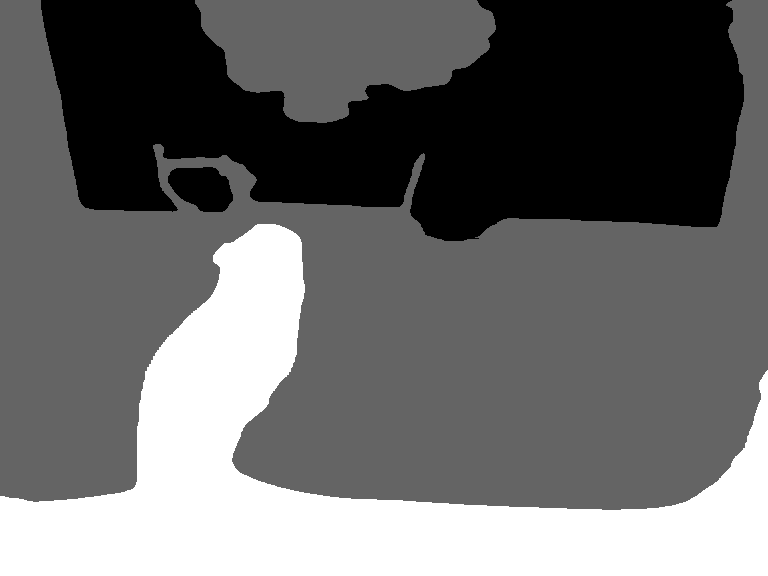

In [ ]:
from google.colab.patches import cv2_imshow
midasmodel_try = Midas(mono_model)
prox_thresh_img = midasmodel_try.onImage_m("dog.jpg")
      #cv2.putText(img_out,f"FPS is {int(fps)}",(15,50), cv2.FONT_HERSHEY_SIMPLEX, 0.70, (255,255,0), 1)
cv2_imshow(prox_thresh_img)

### Display modules

######Google Colab Real-time

Now create the classes to be working with video captured in Google Colab

In [ ]:
# Frames.py
class Frames:
  """
  For each frame creating and object, and the attributes is just the detectro2 model to be computed
  In here the detection is being made for each frame and returned as a byte image
  """

  def __init__(self, frame, ModelDet):
    self.ModelDet = ModelDet
    #self.darknet_helper = darknet_helper
    self.frame = frame

    # create transparent overlay for bounding box
    self.bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    #self.detections, self.width_ratio, self.height_ratio = darknet_helper(frame, width, height)

  def get_bbox_bytes(self):
    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in self.detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * self.width_ratio), int(top * self.height_ratio), int(right * self.width_ratio), int(bottom * self.height_ratio)
      bbox_array = cv2.rectangle(self.bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    #this function from here is just getting the image that is going to be putting in the next frame
    one_image = (self.bbox_array.max(axis = 2) > 0).astype(int) * 255
    #print(one_image.shape)
    bbox_array[:,:,3] = (self.bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_array[:,:,3] = (self.bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    #print(bbox_array[:,:,3])
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    return bbox_bytes

  def get_detectron(self):
    bbox_array = self.bbox_array
    #print(bbox_array.shape)
    #print(detectron.onRealTimeVideo(frame)[:,:,2].shape)
    #bbox_array[:,:,3] = detectron.onRealTimeVideo(frame)[:,:,1]

    bbox_array[:,:,3] = self.ModelDet.onRealTimeVideo(frame)[:,:,1]
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    return bbox_bytes

  def one_img_show(self):
    for label, confidence, bbox in self.detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * self.width_ratio), int(top * self.height_ratio), int(right * self.width_ratio), int(bottom * self.height_ratio)
      cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
      cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)
    cv2_imshow(image)

In [21]:
#Camera
class WebCam:
  """
  Here the webcam is the object, which will receive the model as the attribute,
  the possible methods to be computed are the computation to get the Detectron working on real time
  and this will be happening inside the webcam
  """
  def __init__(self, Model):
    self.Model = Model

  def print_model(self):
    print(self.Model)

  def real_time_Detectron(self):
      # start streaming video from webcam
      video_stream()
      # label for video
      label_html = 'Capturing...'
      # initialze bounding box to empty
      bbox = ''
      count = 0
      while True:
          js_reply = video_frame(label_html, bbox)
          if not js_reply:
              break

          # convert JS response to OpenCV Image
          frame = js_to_image(js_reply["img"])
          # create transparent overlay for bounding box
          bbox_array = np.zeros([480,640,4], dtype=np.uint8)
          bbox_array[:,:,3] = self.Model.onRealTimeVideo(frame)[:,:,1]
          #bbox = bbox_to_bytes(bbox_array)

          bbox_bytes = bbox_to_bytes(bbox_array)
          # update bbox so next frame gets new overlay
          bbox = bbox_bytes

##Multimodel connection

In [3]:
! pip install gtts

In [29]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
import re

class MobileCam(Midas, Detector):
  def __init__(self, midas_model_att, trans_processing, model_type):
    Midas.__init__(self, midas_model_att, trans_processing)
    Detector.__init__(self, model_type)
    self.model_type = Detector.get_attributes(self)

  def show_attribute(self):
    return self.get_attributes()

  def MultOut_img(self, path):
    # hierarchy for stuff
    segment_arr, hierarchy_arr, segmentInfo_stuff = self.onImage_d(path)
    segment_arr, hierarchy_arr = np.flip(segment_arr.numpy()), np.flip(hierarchy_arr)
    pred_id = segmentInfo_stuff['id']
    pred_class = segmentInfo_stuff['class_label']

    #segment_arr = segment_arr.numpy()
    segment_vrvn, segment_vrn, segment_rvn, segment_rn, segment_nn = segment_arr.copy(), segment_arr.copy(), segment_arr.copy(), segment_arr.copy(), segment_arr.copy()
    segment_vrvn[hierarchy_arr != 1] = 0 # very relevant very near
    segment_rvn[hierarchy_arr != 2] = 0 # relevant very near
    segment_vrn[hierarchy_arr != 1] = 0 # very relevant near
    segment_rn[hierarchy_arr != 2] = 0 # relevant near
    segment_nn[hierarchy_arr != 3] = 0 # not relevant

    # ============================ hierarchy for depth ====================================
    depth_array = self.onImage_m(path)
    #depth_array = depth_array.T
    depth_thresh = np.unique(depth_array)
    segment_vrvn[depth_array != depth_thresh[-1]] = 0 # Very Relevant and very near
    segment_rvn[depth_array != depth_thresh[-1]] = 0 # Relevant and very near
    segment_vrn[depth_array != depth_thresh[-2]] = 0 # Very Relevant and near
    segment_rn[depth_array != depth_thresh[-2]] = 0 # Relevant and near

    # ============ Predict the poistion for each object / stuff detected ===================
    h_mod = len(segment_arr) % 3
    w_mod = len(segment_arr[0]) % 3
    if h_mod != 0:
        segment_arr = segment_arr[:-h_mod, :]
    if w_mod != 0:
        segment_arr = segment_arr[:, :-w_mod]

    # get the amount the amount of pixels they correspond for each quadrant
    h = len(segment_arr) // 3
    w = len(segment_arr[0]) // 3
    q_area = h * w

    # devided into grid of 3 x 3
    quad = [segment_arr[:h, :w], segment_arr[:h, w:2*w], segment_arr[:h, 2*w:],
        segment_arr[h:2*h, :w], segment_arr[h:2*h, w:2*w], segment_arr[h:2*h, 2*w:],
        segment_arr[2*h:, :w], segment_arr[2*h:, w:2*w], segment_arr[2*h:, 2*w:]
        ] # quadrants

    # get the prediction for each label
    quad_dict = {0: 'left top', 1: 'center top', 2: 'right top',
                  3: 'middle left' , 4: 'middle center' , 5:'middle right' ,
                  6:'down left' , 7: 'down center', 8: 'down right'}

    # class unique class id
    id_dict = {l:np.array([]) for l in pred_id}

    for k in id_dict:
        for q in quad:
            id_dict[k] = np.append(len(q[q == k]), id_dict[k])
        id_dict[k] = id_dict[k]/q_area
        id_dict[k] = quad_dict[np.where(id_dict[k] == max(id_dict[k]))[0][0]] #[::-1] index for quadrant
    #print(id_dict)

    # ========================================= display ==================================
    vr_vn = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_vrvn) if i != 0]
    #print('\nVery Relevant, Very Near:', vr_vn)
    r_vn = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_rvn) if i != 0]
    vr_n = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_vrn) if i != 0]
    r_n = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_rn) if i != 0]

    text = []
    vr_vn_len = len(vr_vn) > 0
    if vr_vn_len:
      text.append('\nprecaución acercándose a')
      #[print(p[0] + ' '+ p[1] + ', ') for p in vr_vn]
      [text.append(p[0] + ' '+ p[1] + ' ') for p in vr_vn]

    if len(r_vn) > 0:
      if not vr_vn_len:
        text.append('\nprecaución acercándose a')
      [text.append(p[0] + ' '+ p[1] + ' ') for p in r_vn]

    vr_n_l = len(vr_n) > 0
    if vr_n_l:
      text.append('\npróximamente')
      [text.append(p[0] + ' '+ p[1] + ' ') for p in vr_n]

    if len(r_n) > 0:
      if not vr_n_l:
        text.append('\npróximamente')
      [text.append(p[0] + ' '+ p[1] + ' ') for p in r_n]

    text = ', '.join(text)
    #print(text)
    # Text to speech automatic play
    tts = gTTS(text) #Provide the string to convert to speech
    tts.save('1.wav') #save the string converted to speech as a .wav file
    sound_file = '1.wav'

    #cv2.waitKey(3)
    #print('el texto ya se dijo')
    return Audio(sound_file, autoplay=True)

  def MultOut_RealTime(self, disp_pred=False):
    # start streaming video from webcam
    video_stream()
    # label for video
    label_html = 'Capturing...'
    # initialze bounding box to empty
    bbox = ''
    count = 0
    while True:
        js_reply = video_frame(label_html, bbox)
        if not js_reply:
            break

        # convert JS response to OpenCV Image
        frame = js_to_image(js_reply["img"])

        # create transparent overlay for bounding box
        bbox_array = np.zeros([480,640,4], dtype=np.uint8)


        # ========================== hierarchy for stuff ====================================
        segment_arr, hierarchy_arr, segmentInfo_stuff, bbox_array[:,:,3] = self.onVideo_d(frame)
        segment_arr, hierarchy_arr = segment_arr.T, hierarchy_arr.T
        pred_id = segmentInfo_stuff['id']
        pred_class = segmentInfo_stuff['class_label']

        if disp_pred == True:
          bbox_bytes = bbox_to_bytes(bbox_array)
          bbox = bbox_bytes
        else:
          pass

        #print(pred_class)
        segment_arr = segment_arr.numpy()
        segment_vrvn, segment_vrn, segment_rvn, segment_rn, segment_nn = segment_arr.copy(), segment_arr.copy(), segment_arr.copy(), segment_arr.copy(), segment_arr.copy()
        segment_vrvn[hierarchy_arr != 1] = 0 # very relevant very near
        segment_rvn[hierarchy_arr != 2] = 0 # relevant very near
        segment_vrn[hierarchy_arr != 1] = 0 # very relevant near
        segment_rn[hierarchy_arr != 2] = 0 # relevant near
        segment_nn[hierarchy_arr != 3] = 0 # not relevant

        # ============================ hierarchy for depth ====================================
        depth_array = self.onVideo_m(frame)
        depth_array = depth_array.T
        depth_thresh = np.unique(depth_array)
        segment_vrvn[depth_array != depth_thresh[-1]] = 0 # Very Relevant and very near
        segment_rvn[depth_array != depth_thresh[-1]] = 0 # Relevant and very near
        segment_vrn[depth_array != depth_thresh[-2]] = 0 # Very Relevant and near
        segment_rn[depth_array != depth_thresh[-2]] = 0 # Relevant and near

        # ============ Predict the poistion for each object / stuff detected ===================
        h_mod = len(segment_arr) % 3
        w_mod = len(segment_arr[0]) % 3
        if h_mod != 0:
            segment_arr = segment_arr[:-h_mod, :]
        if w_mod != 0:
            segment_arr = segment_arr[:, :-w_mod]

        # get the amount the amount of pixels they correspond for each quadrant
        h = len(segment_arr) // 3
        w = len(segment_arr[0]) // 3
        q_area = h * w

        # devided into grid of 3 x 3
        quad = [segment_arr[:h, :w], segment_arr[:h, w:2*w], segment_arr[:h, 2*w:],
            segment_arr[h:2*h, :w], segment_arr[h:2*h, w:2*w], segment_arr[h:2*h, 2*w:],
            segment_arr[2*h:, :w], segment_arr[2*h:, w:2*w], segment_arr[2*h:, 2*w:]
            ] # quadrants

        # get the prediction for each label
        quad_dict = {0: 'left top', 1: 'center top', 2: 'right top',
                      3: 'middle left' , 4: 'middle center' , 5:'middle right' ,
                      6:'down left' , 7: 'down center', 8: 'down right'}

        # class unique class id
        id_dict = {l:np.array([]) for l in pred_id}

        for k in id_dict:
            for q in quad:
                id_dict[k] = np.append(len(q[q == k]), id_dict[k])
            id_dict[k] = id_dict[k]/q_area
            id_dict[k] = quad_dict[np.where(id_dict[k] == max(id_dict[k]))[0][0]] #[::-1] index for quadrant
        #print(id_dict)

        # ========================================= display ==================================
        vr_vn = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_vrvn) if i != 0]
        #print('\nVery Relevant, Very Near:', vr_vn)
        r_vn = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_rvn) if i != 0]
        vr_n = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_vrn) if i != 0]
        r_n = [(pred_class[pred_id.index(i)], id_dict[i]) for i in np.unique(segment_rn) if i != 0]

        text = []
        vr_vn_len = len(vr_vn) > 0
        if vr_vn_len:
          text.append('\nprecaución acercándose a')
          #[print(p[0] + ' '+ p[1] + ', ') for p in vr_vn]
          [text.append(p[0] + ' '+ p[1] + ' ') for p in vr_vn]

        if len(r_vn) > 0:
          if not vr_vn_len:
            text.append('\nprecaución acercándose a')
          [text.append(p[0] + ' '+ p[1] + ' ') for p in r_vn]

        vr_n_l = len(vr_n) > 0
        if vr_n_l:
          text.append('\npróximamente')
          [text.append(p[0] + ' '+ p[1] + ' ') for p in vr_n]

        if len(r_n) > 0:
          if not vr_n_l:
            text.append('\npróximamente')
          [text.append(p[0] + ' '+ p[1] + ' ') for p in r_n]

        text = ', '.join(text)
        print(text)
        # Text to speech automatic play
        tts = gTTS(text) #Provide the string to convert to speech
        tts.save('1.wav') #save the string converted to speech as a .wav file
        sound_file = '1.wav'
        Audio(sound_file, autoplay=True)
        cv2.waitKey(3)
        print('el texto ya se dijo')

# Main



### Multimodel output

In [62]:
t = [('person', 'middle left'), ('wall', 'center top')]
for i in t:
  print(i[0], i[1])

person middle left
wall center top


In [16]:
mymodel = MobileCam(midas_model, transform, 'PS')
mymodel.MultOut_RealTime(False)

KeyboardInterrupt: 

In [30]:
mymodel = MobileCam(midas_model, transform, 'PS')
mymodel.MultOut_img("dog.jpg")

#### Midas test

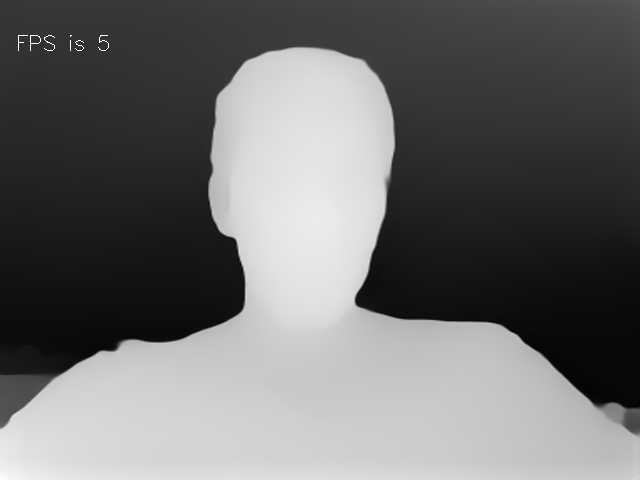

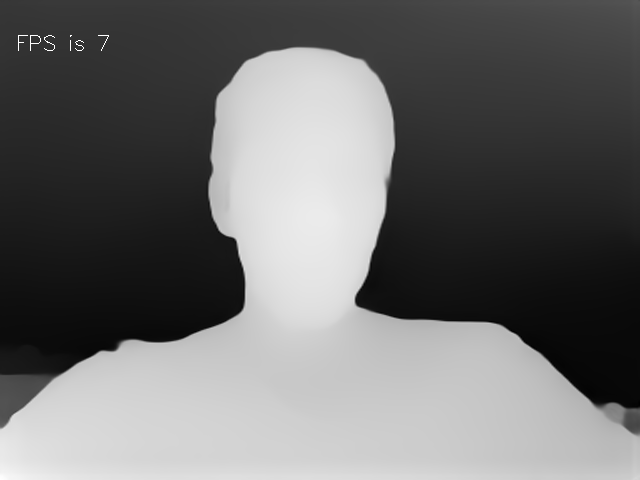

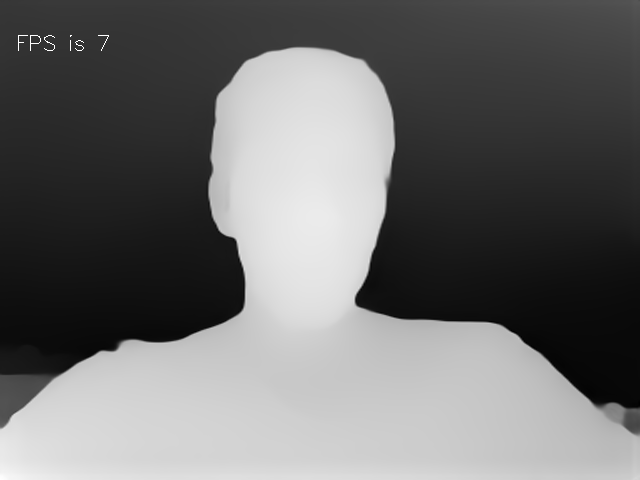

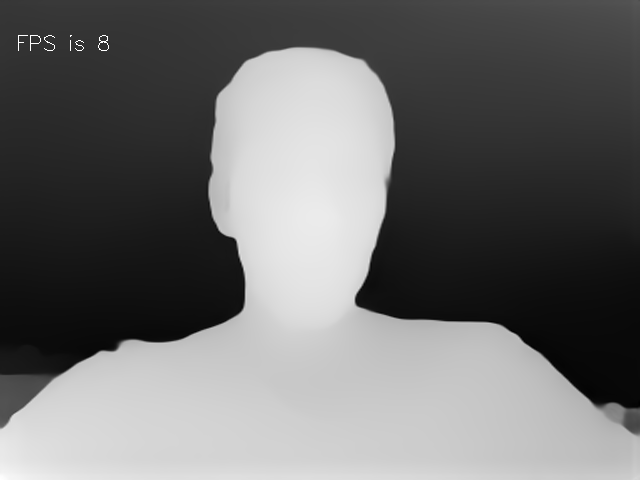

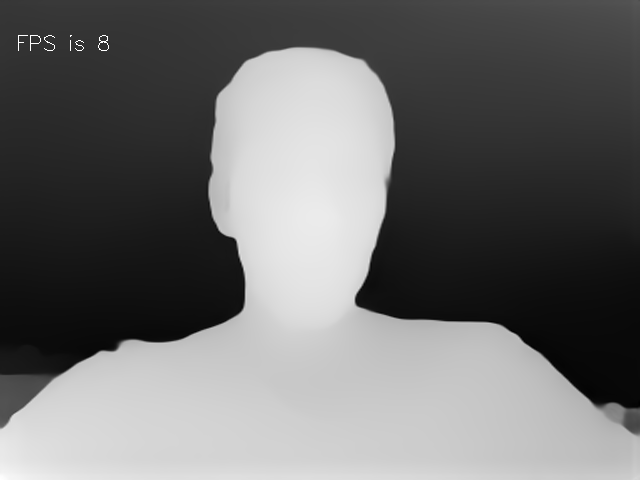

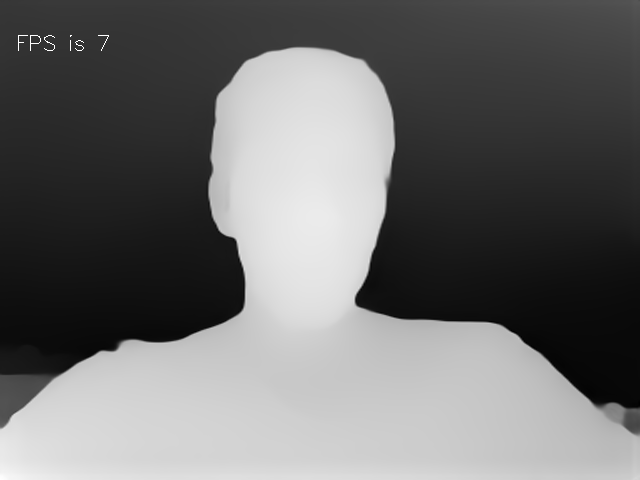

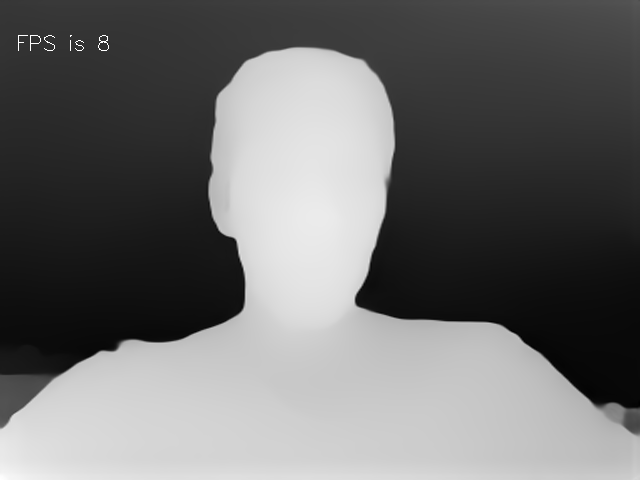

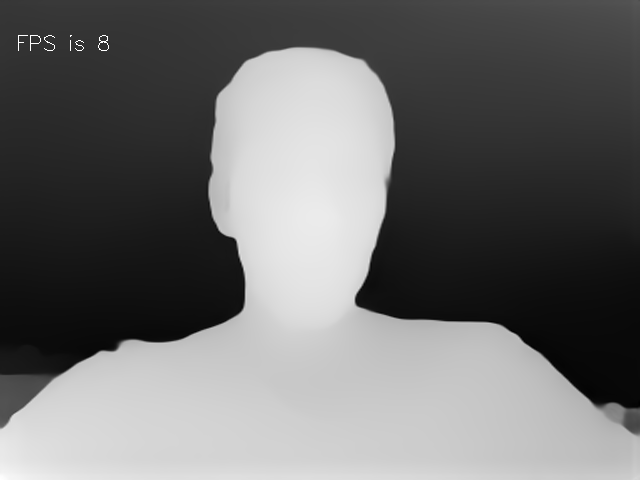

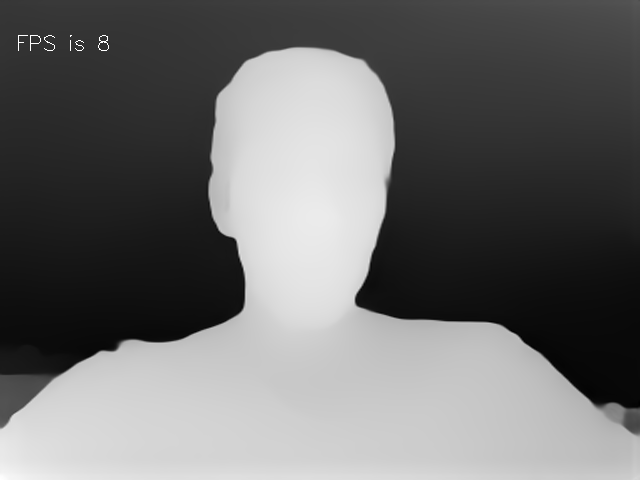

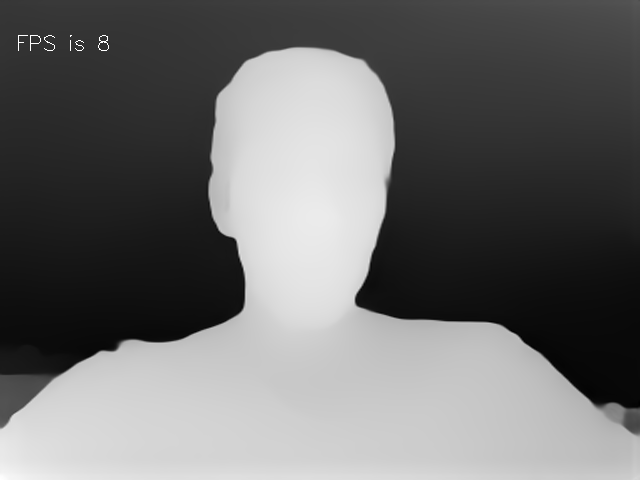

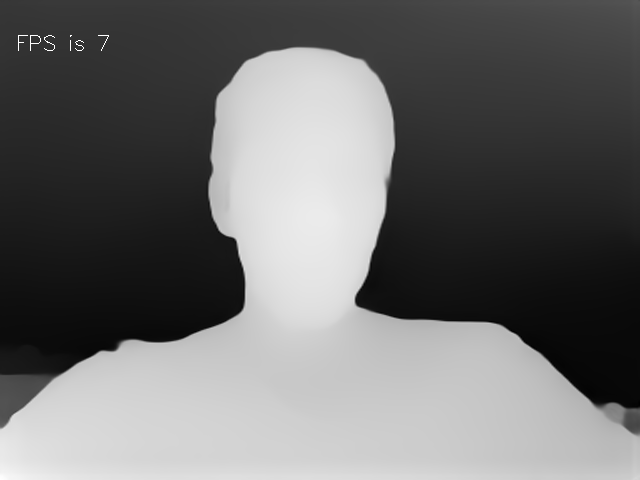

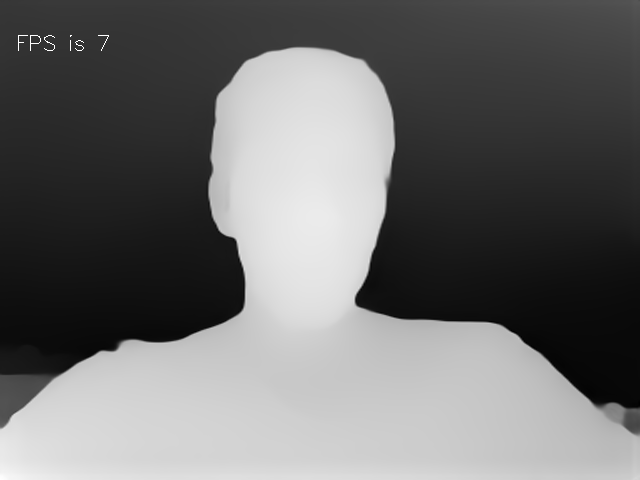

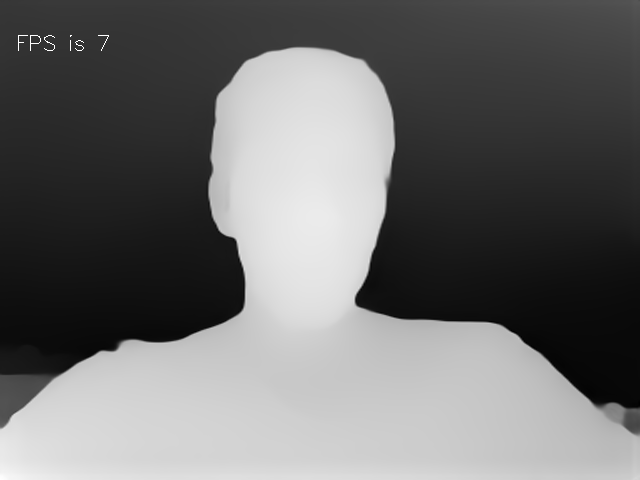

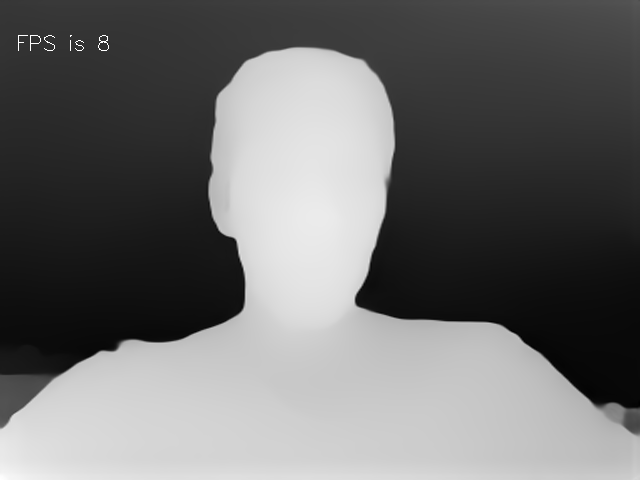

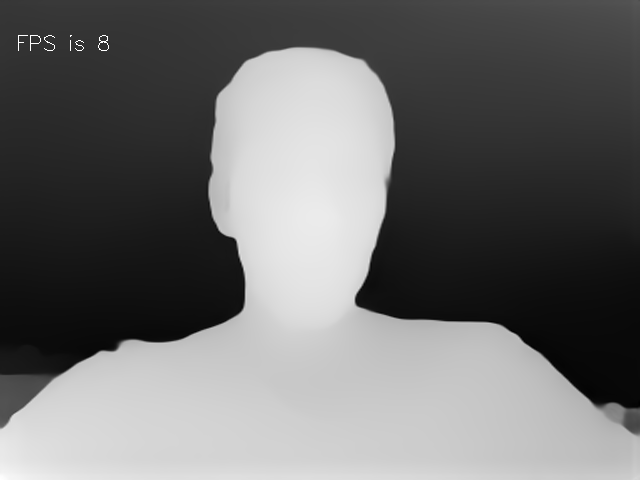

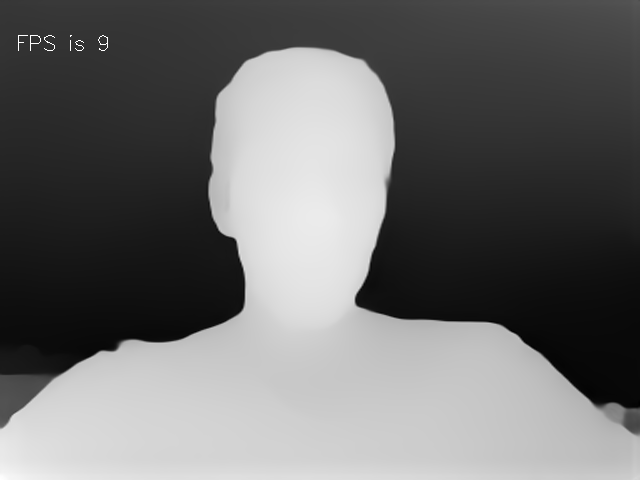

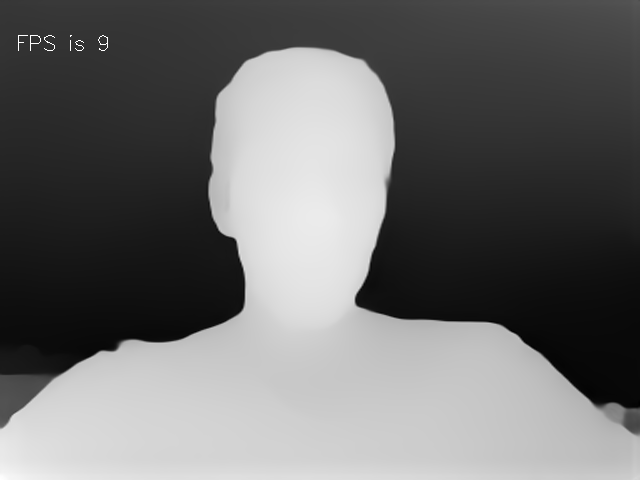

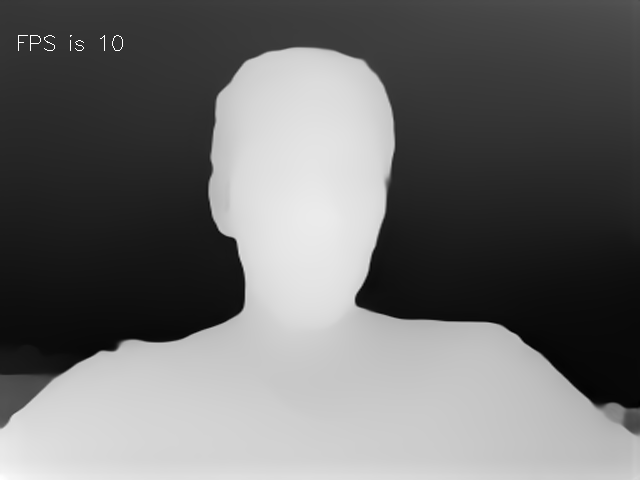

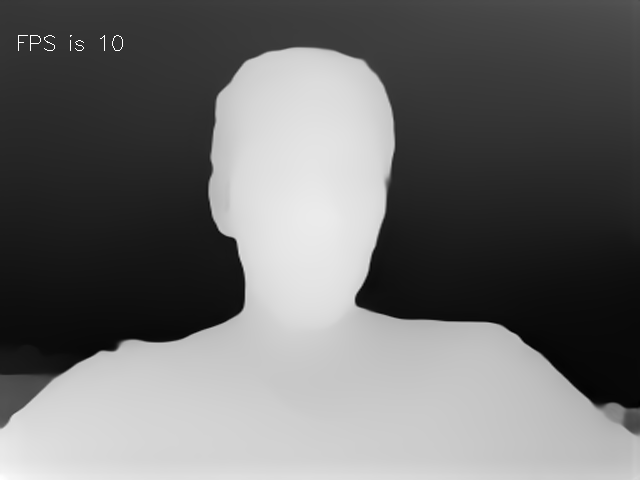

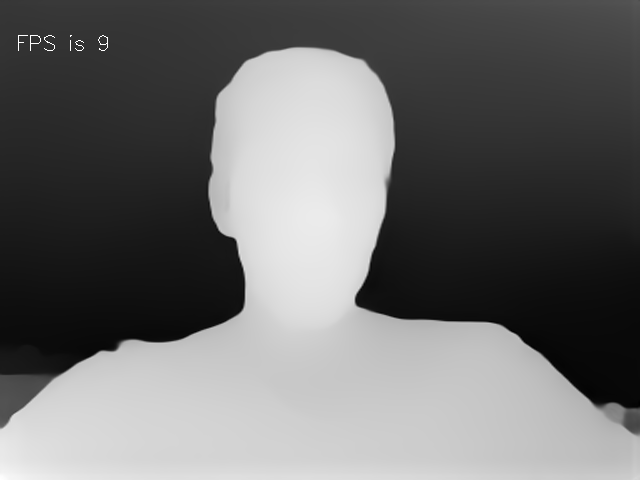

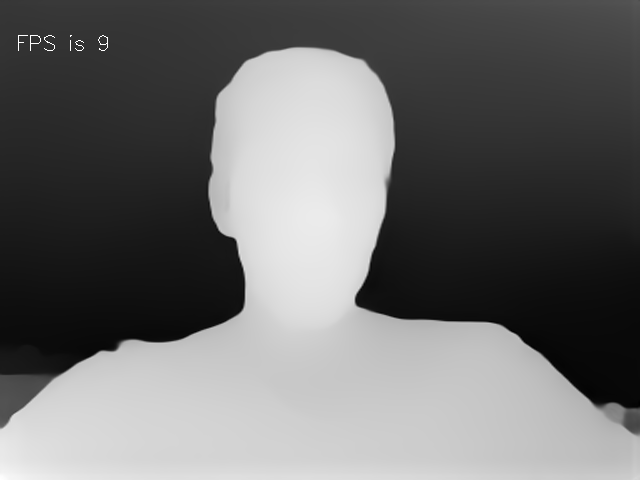

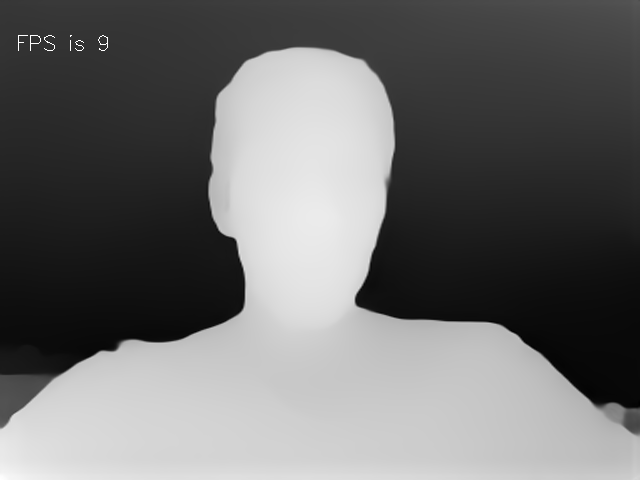

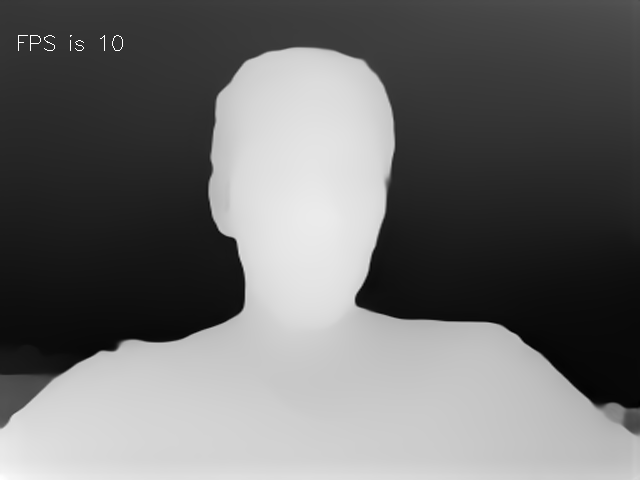

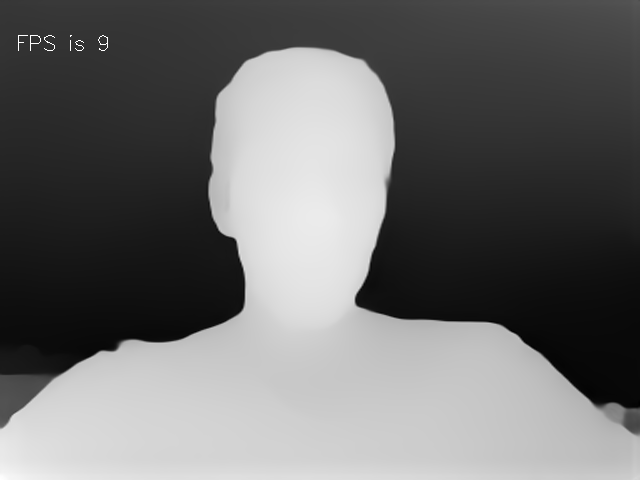

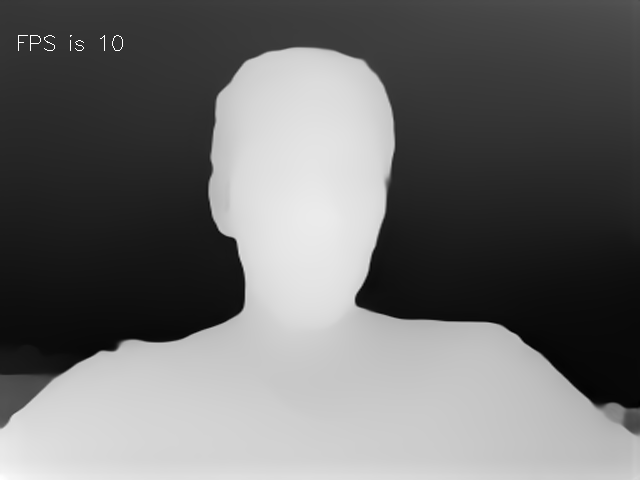

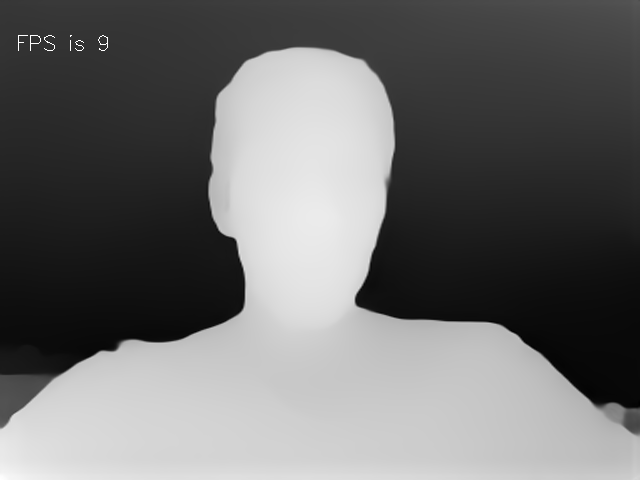

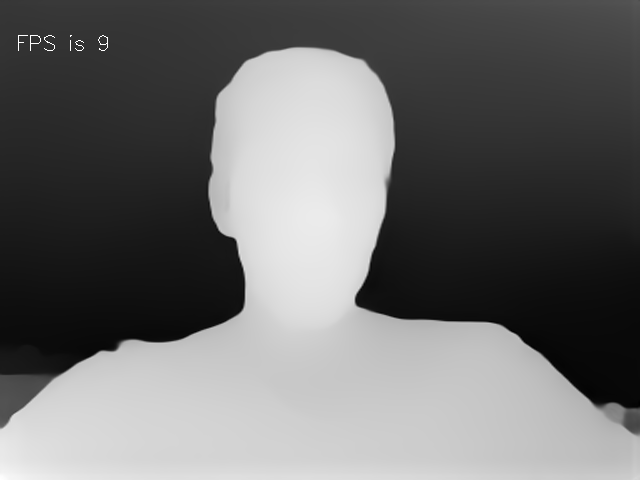

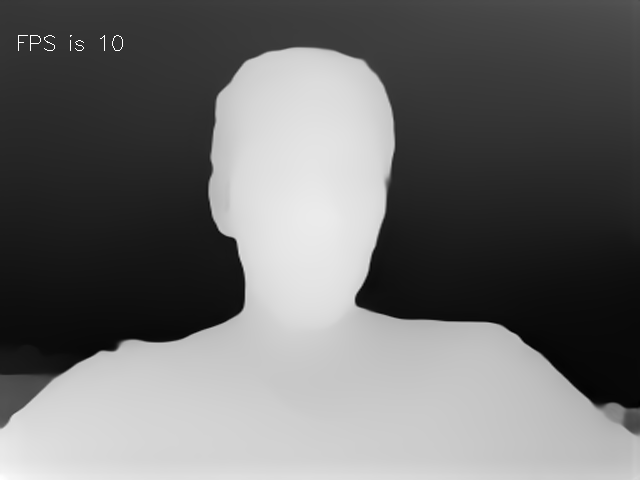

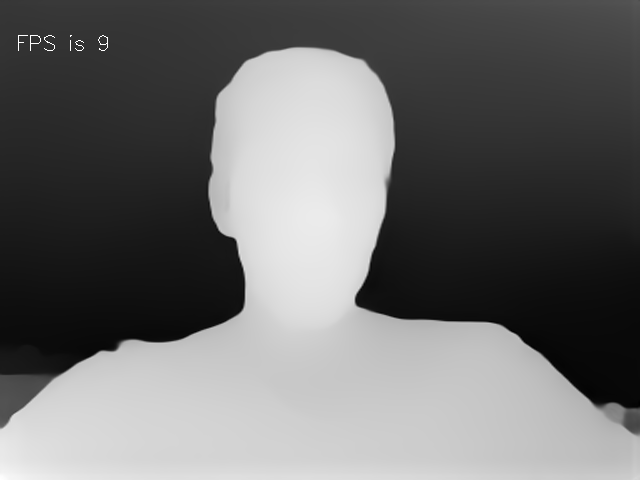

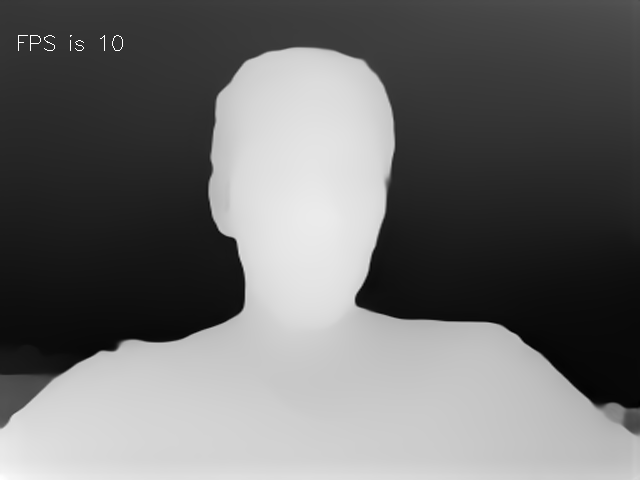

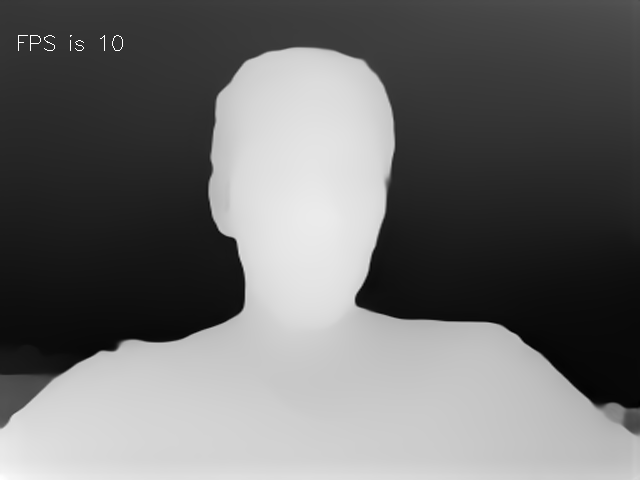

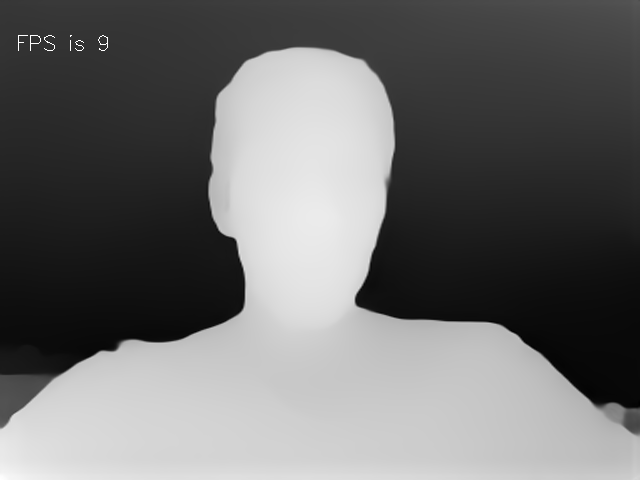

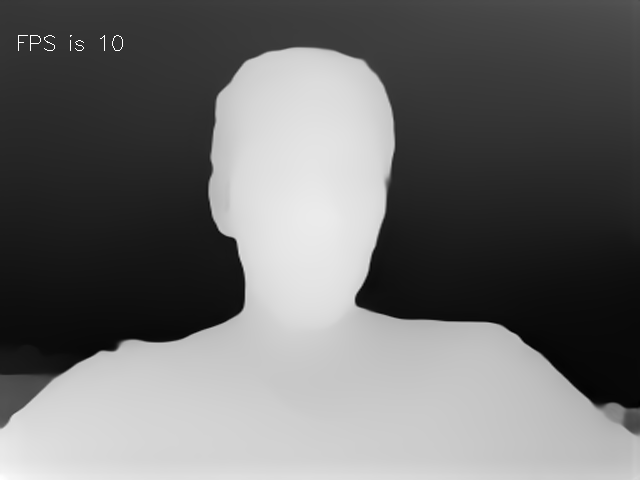

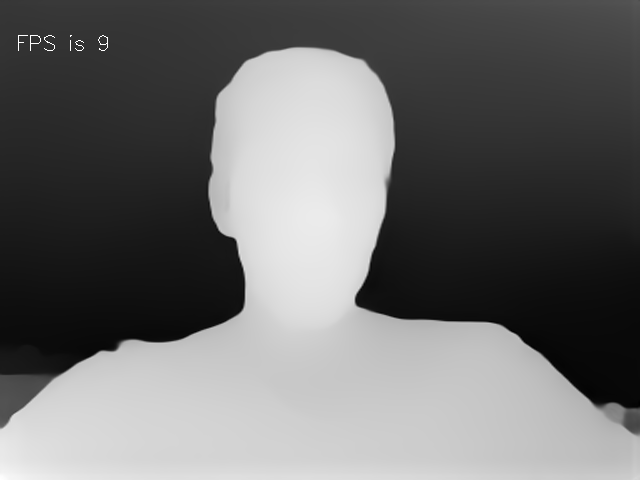

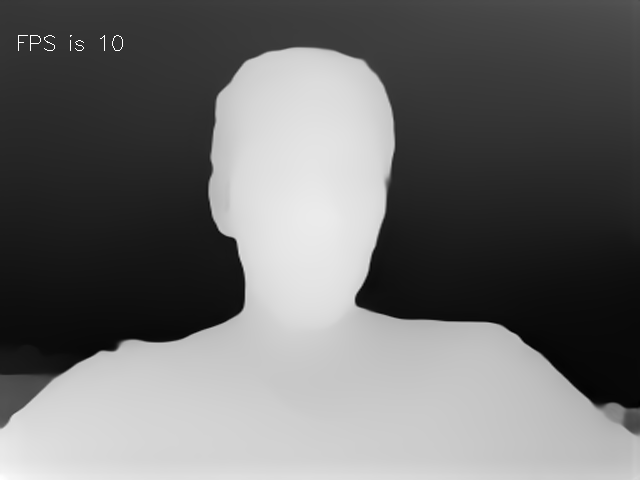

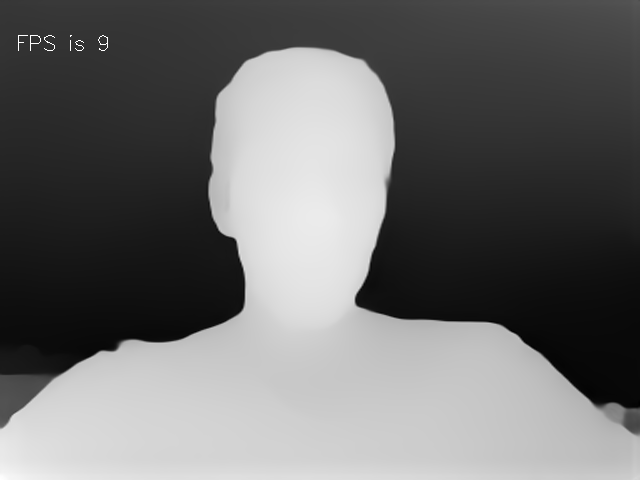

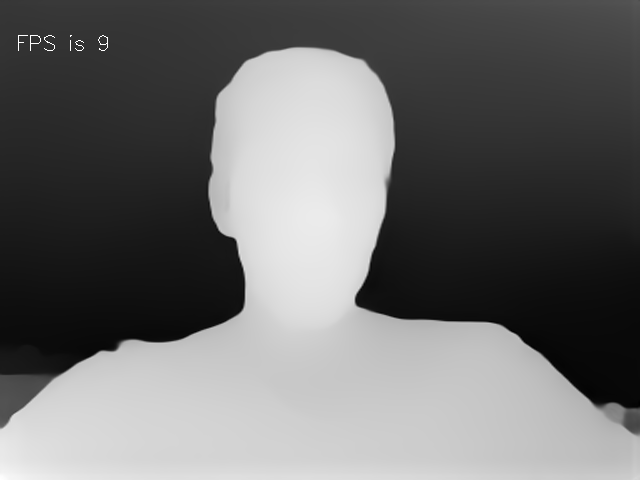

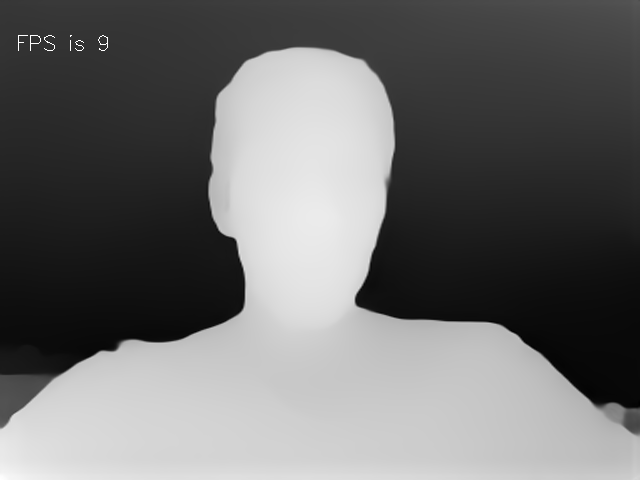

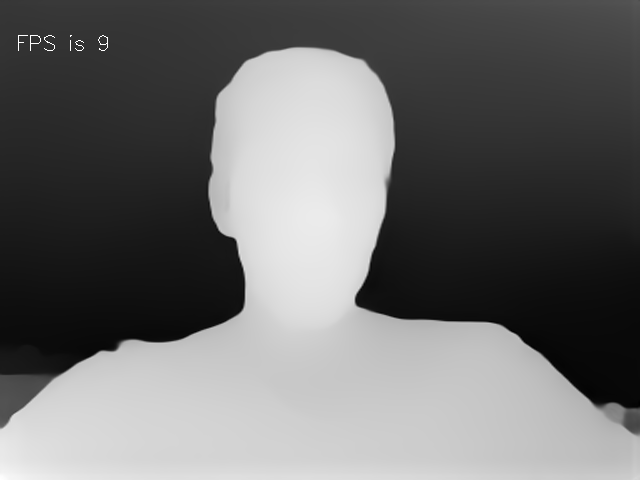

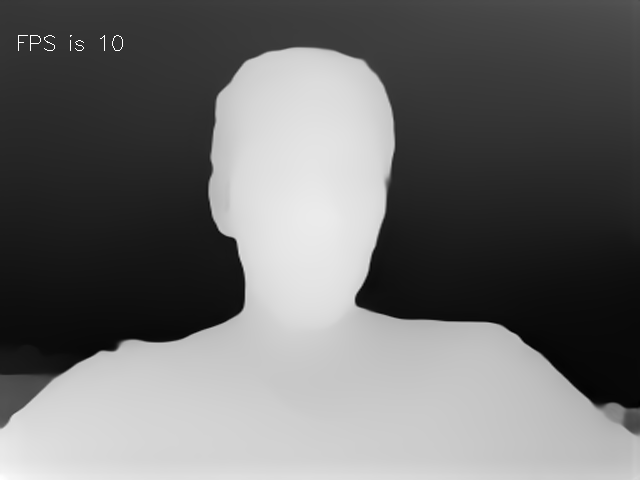

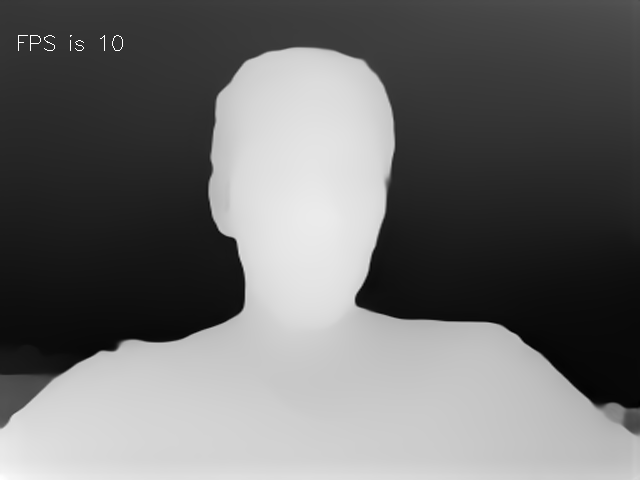

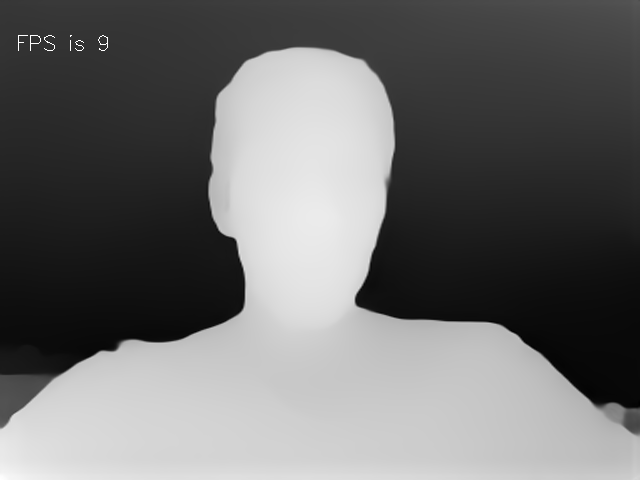

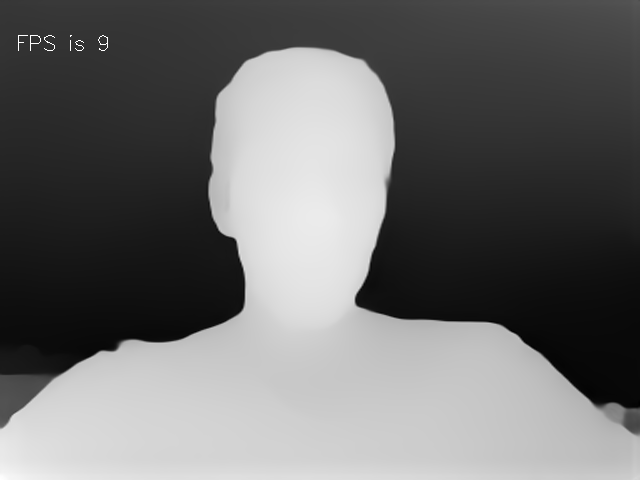

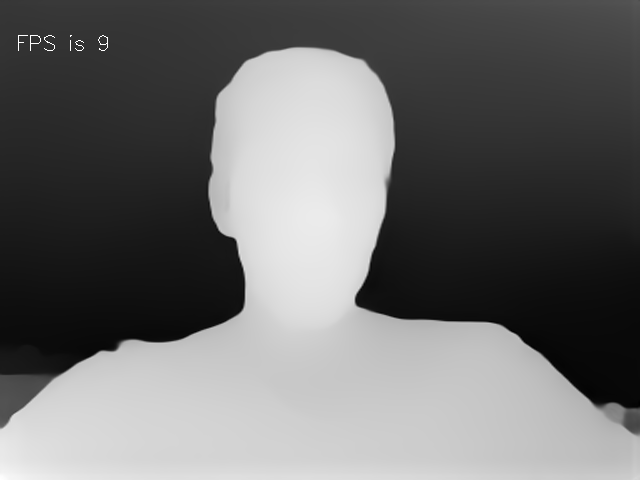

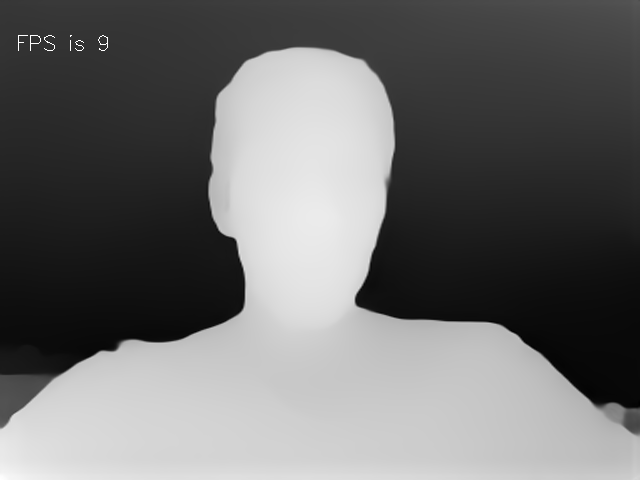

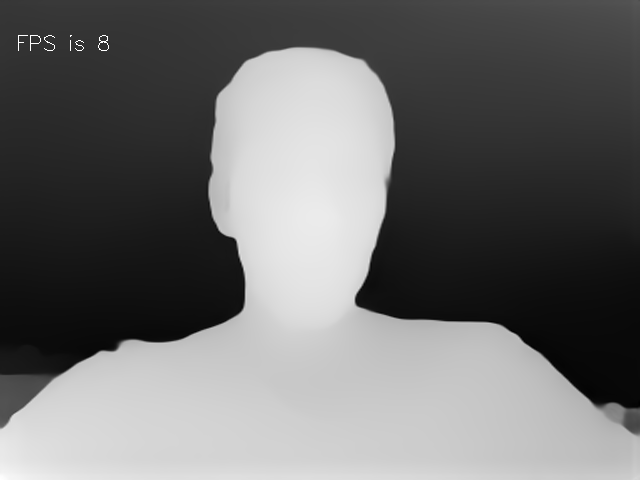

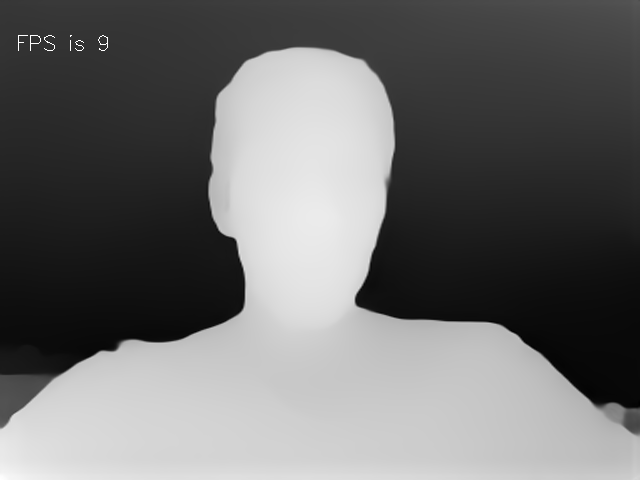

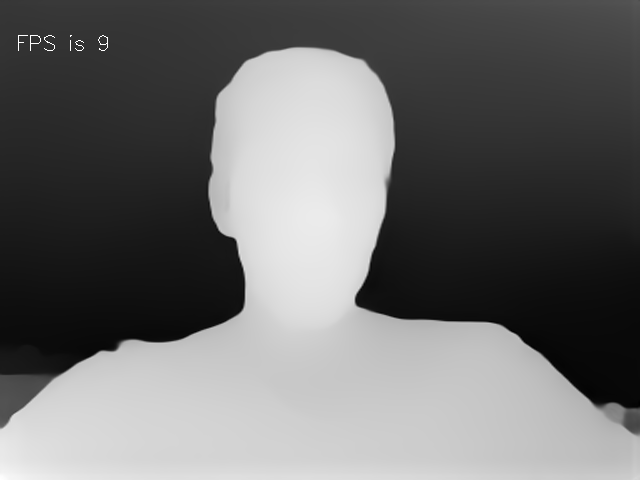

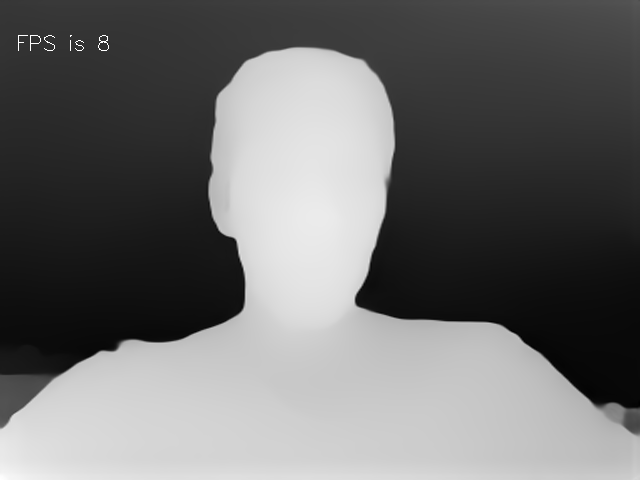

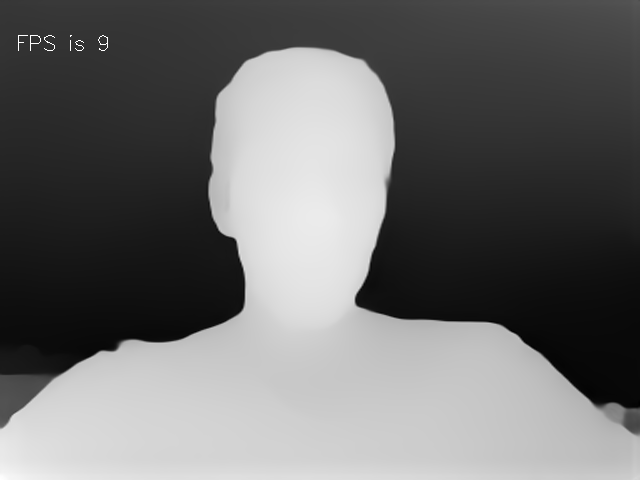

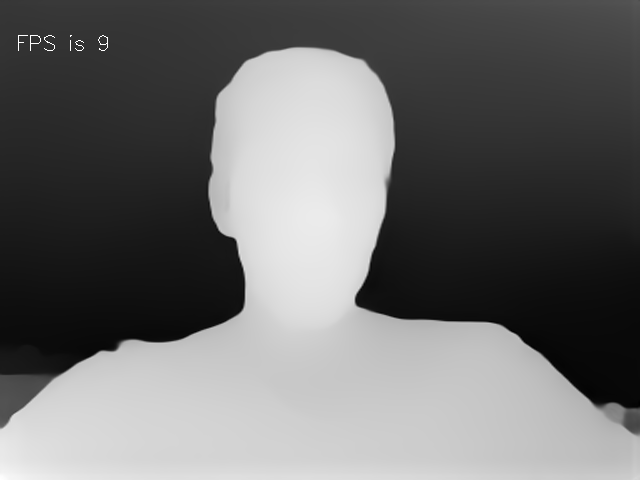

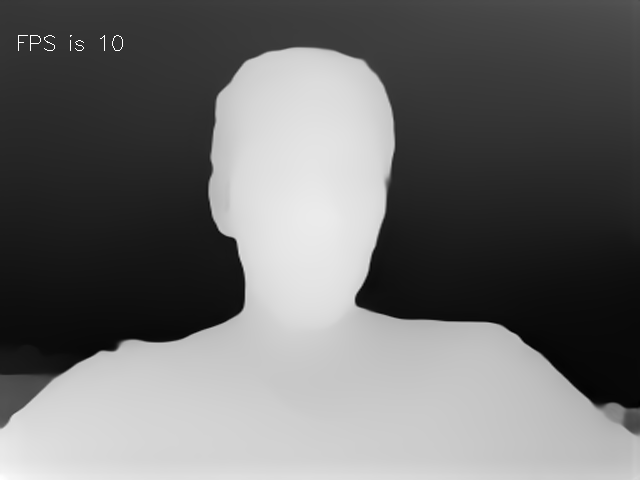

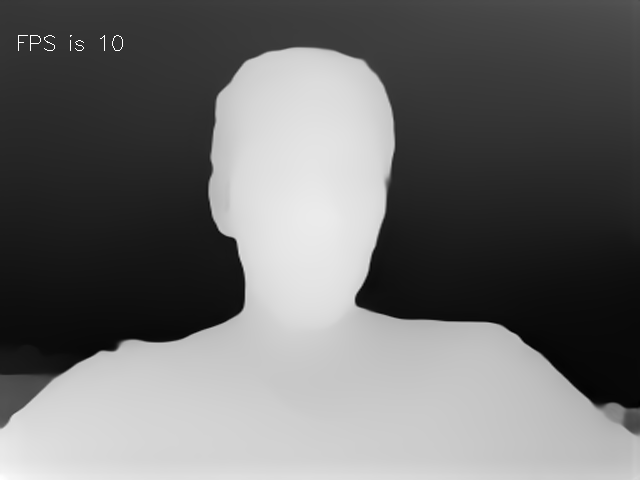

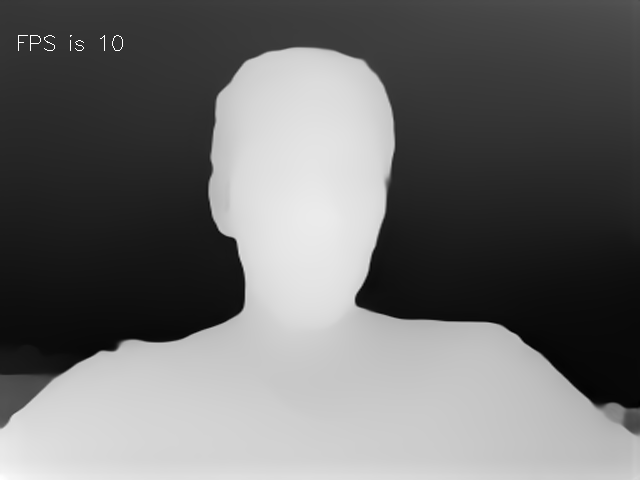

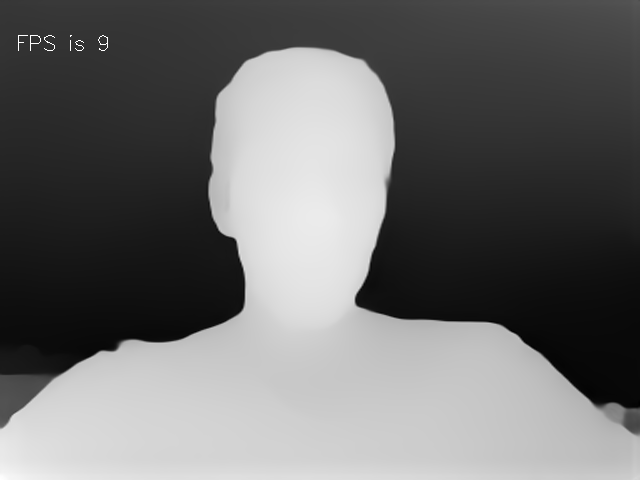

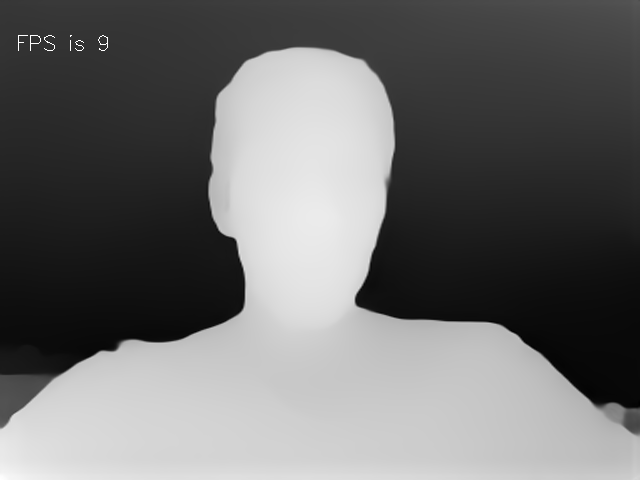

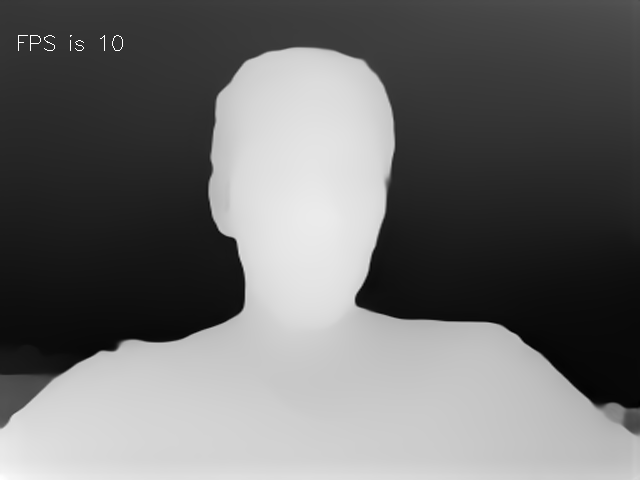

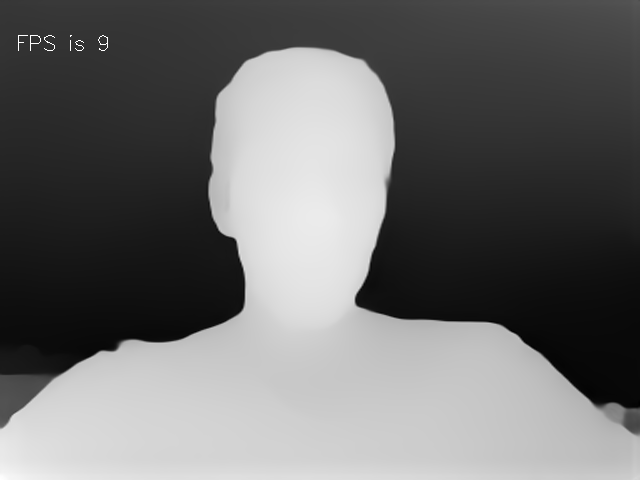

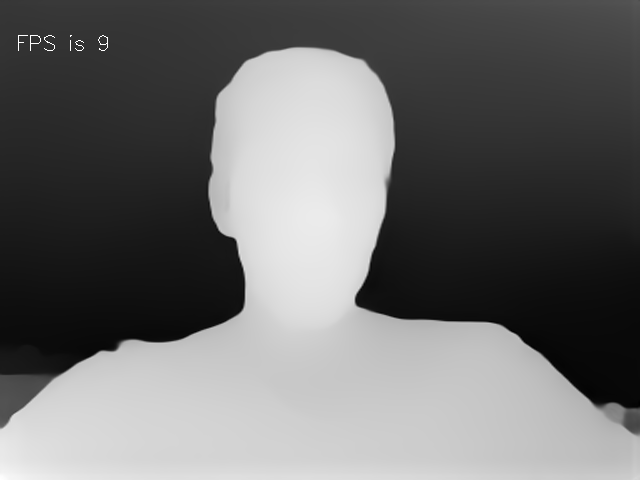

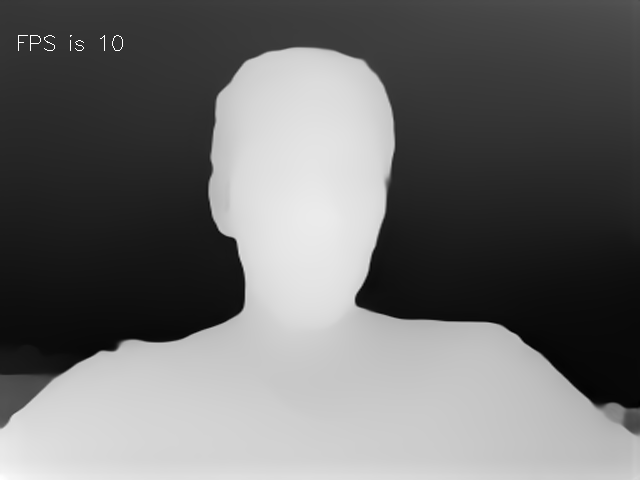

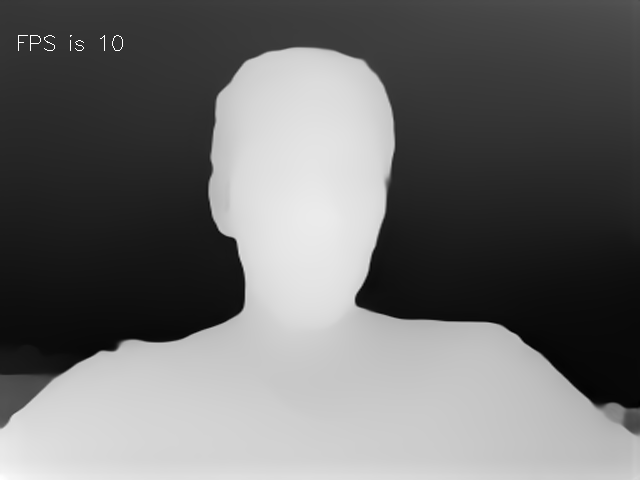

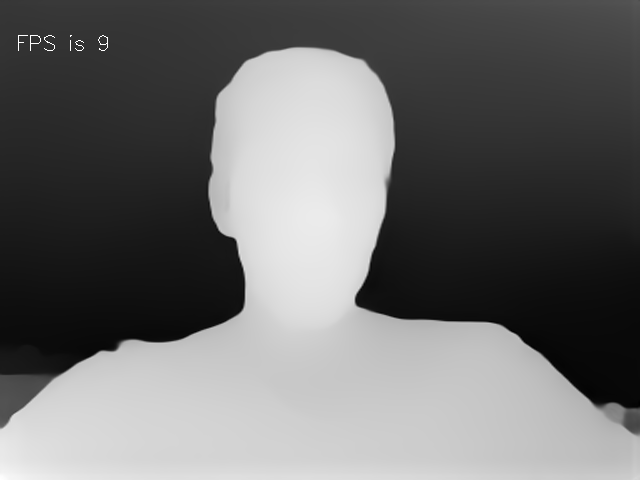

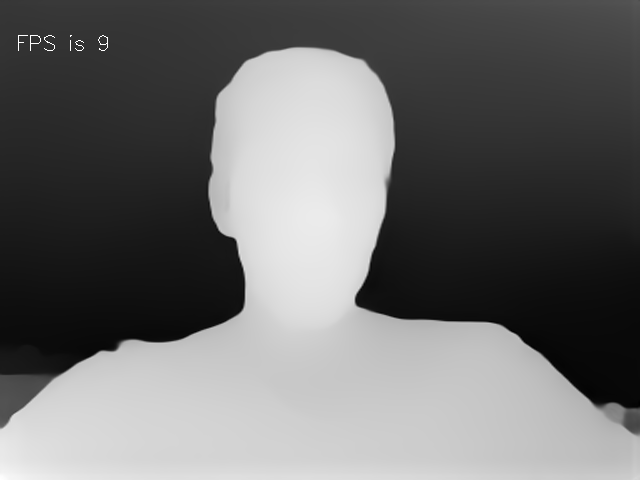

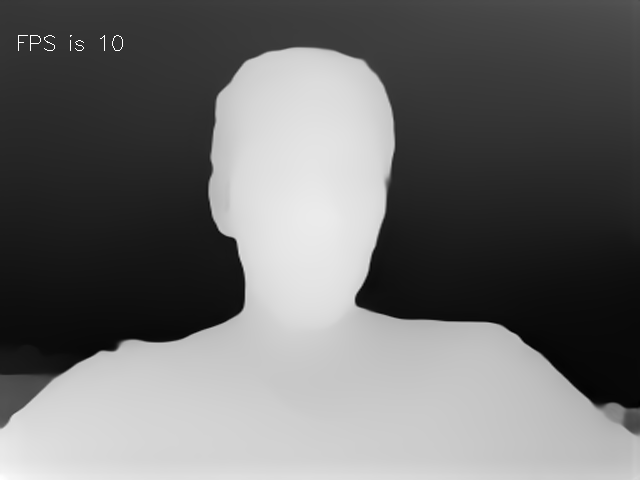

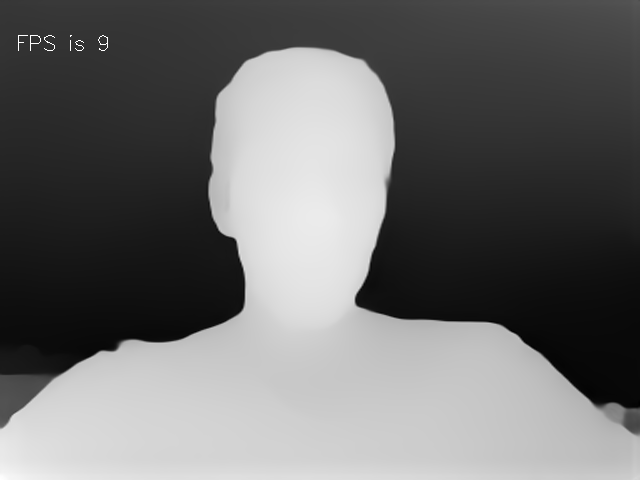

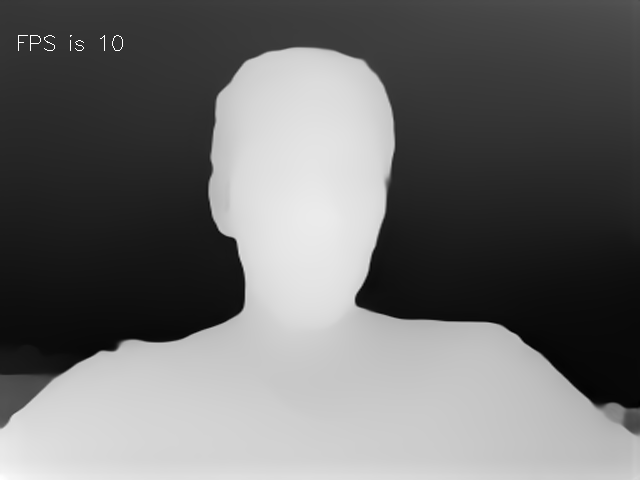

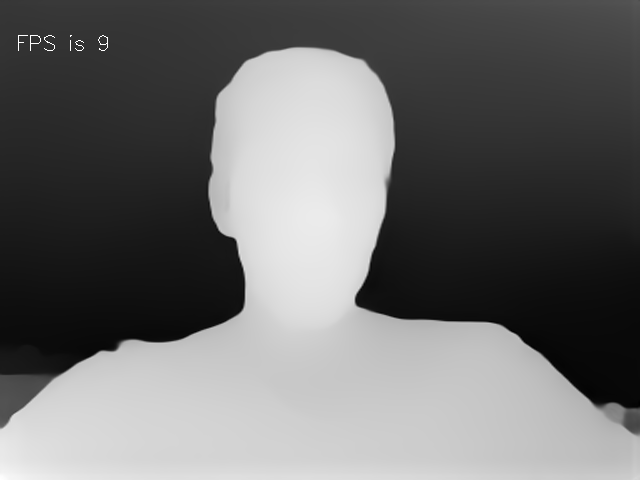

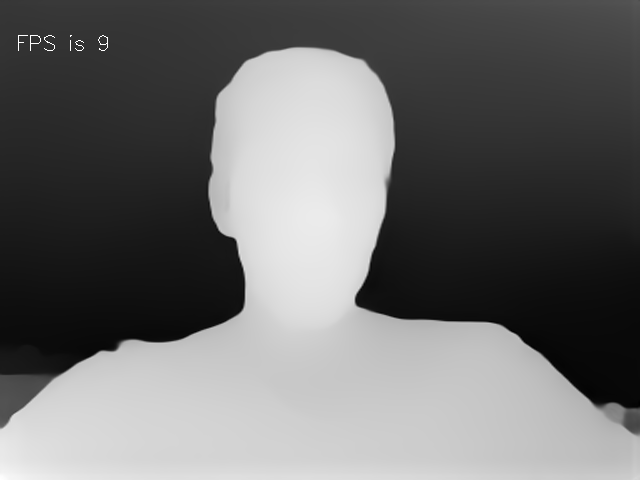

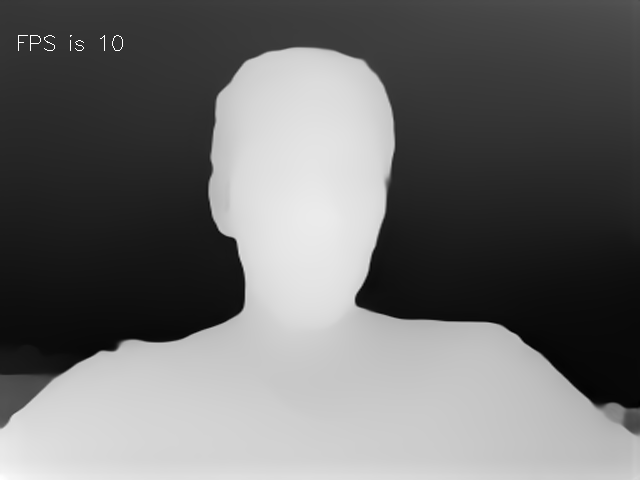

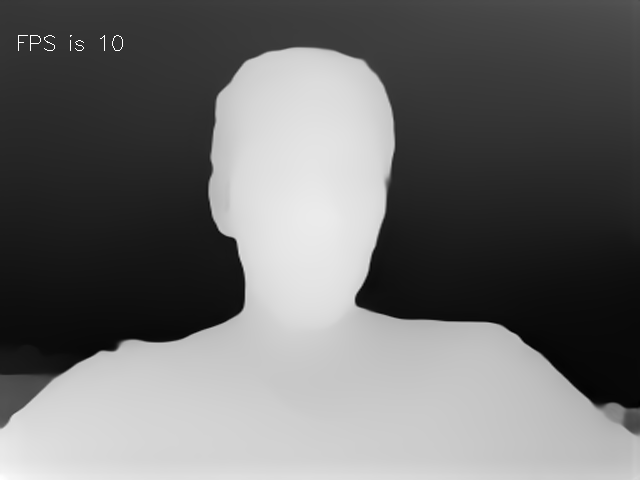

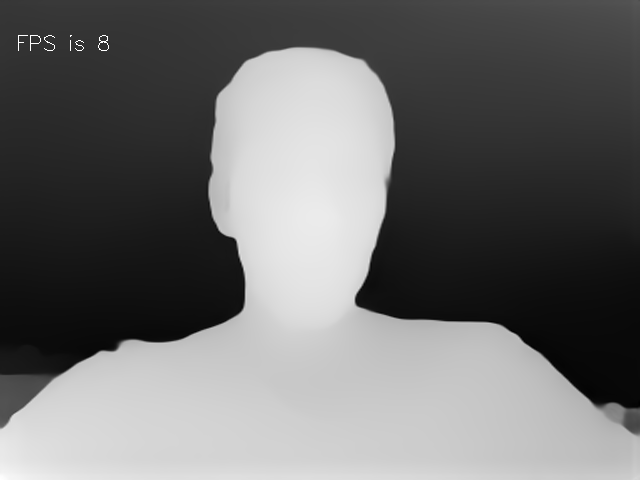

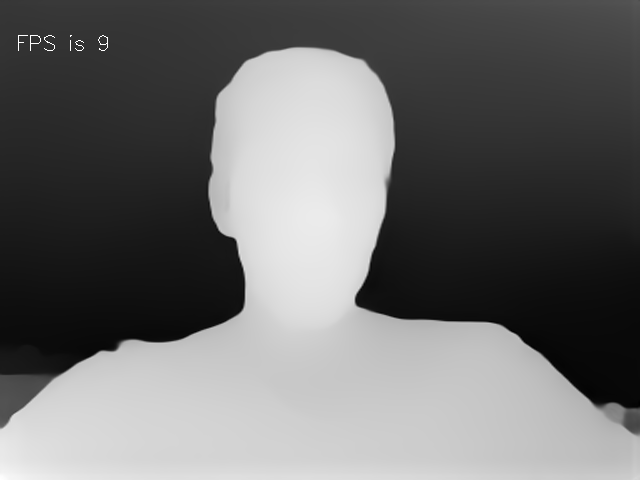

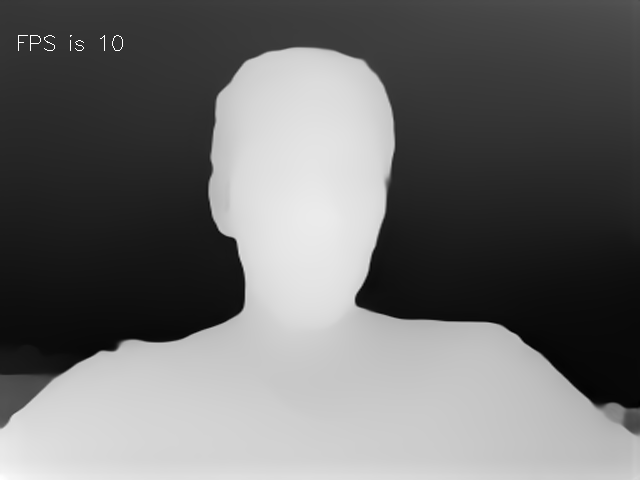

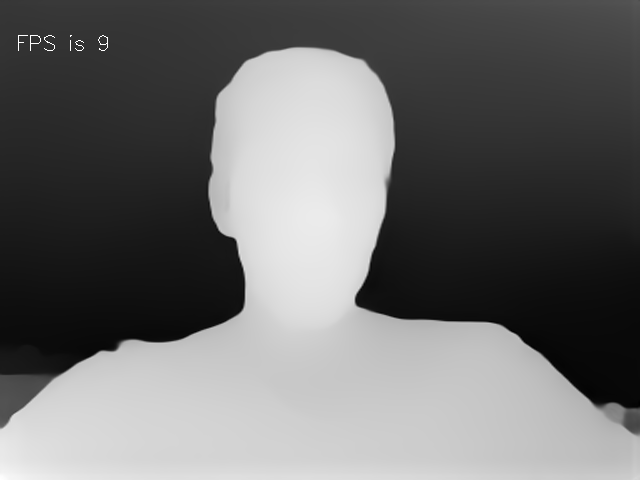

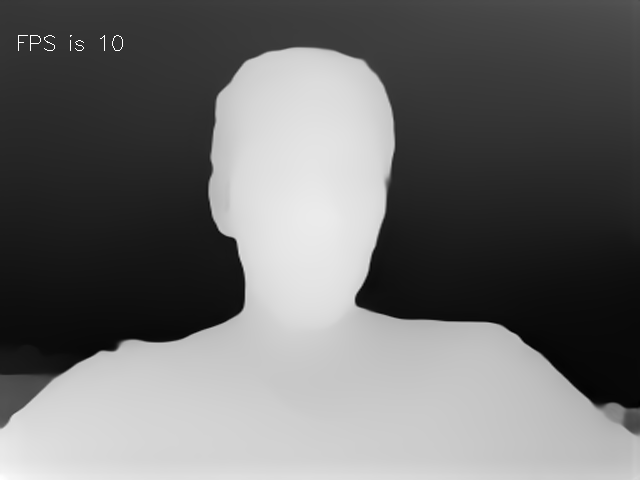

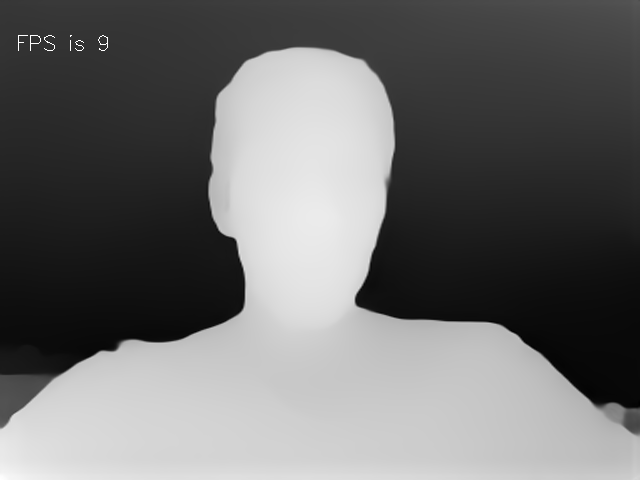

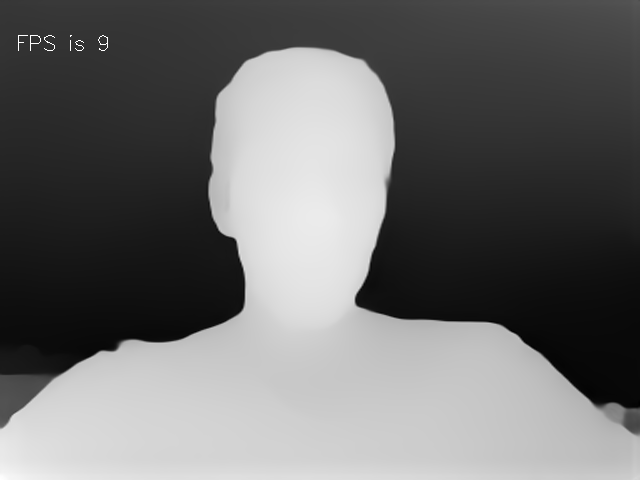

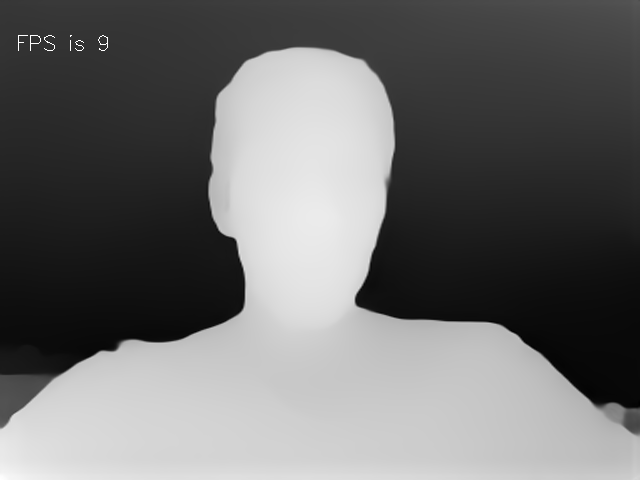

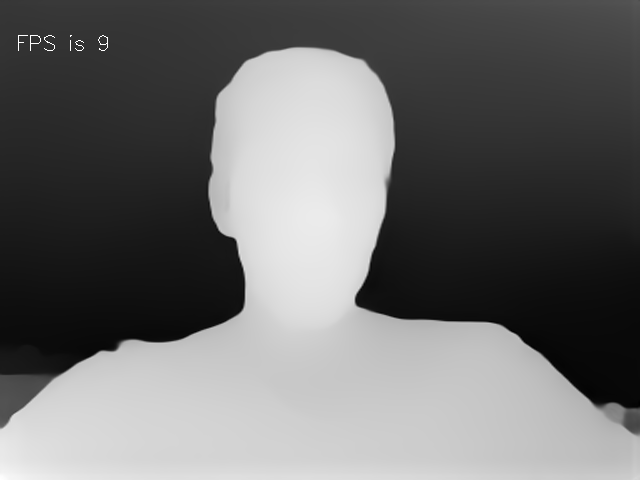

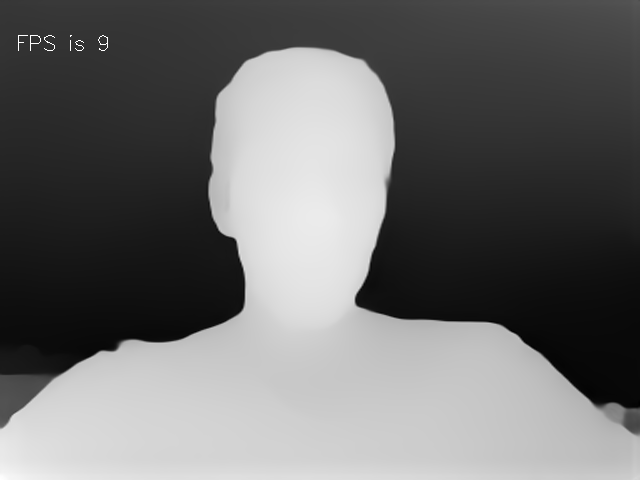

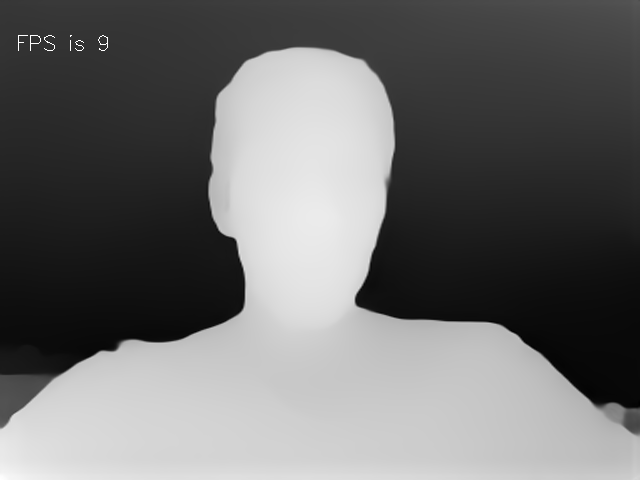

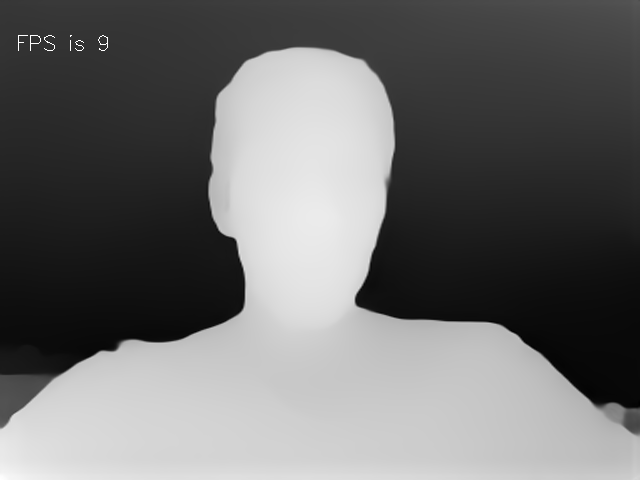

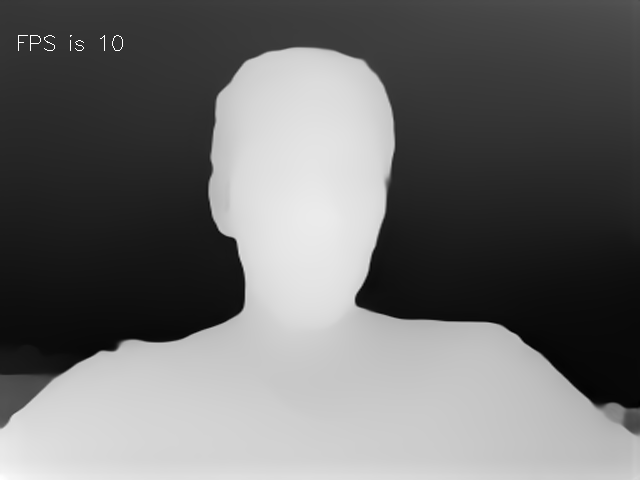

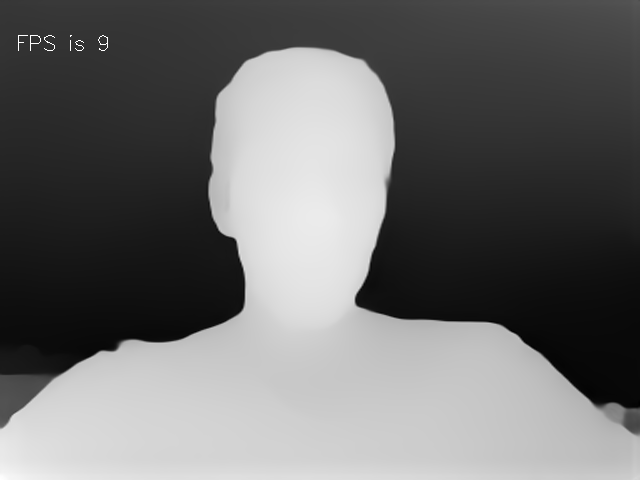

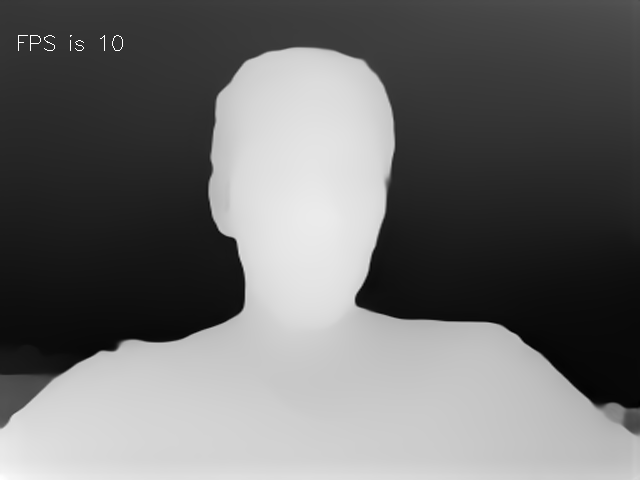

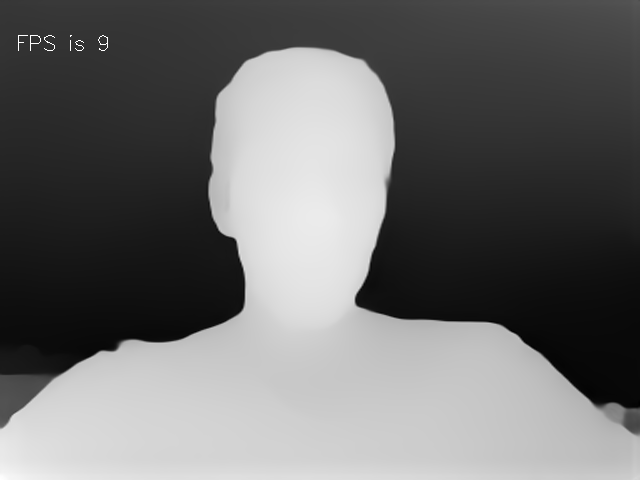

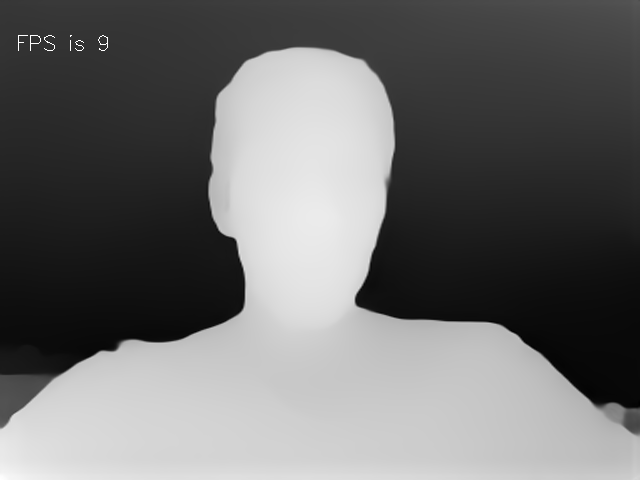

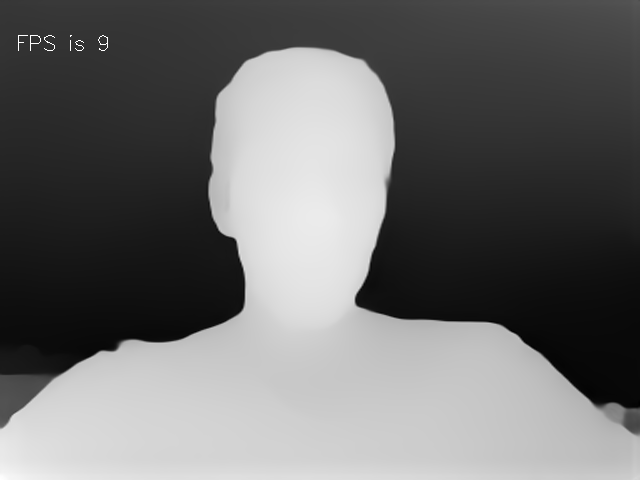

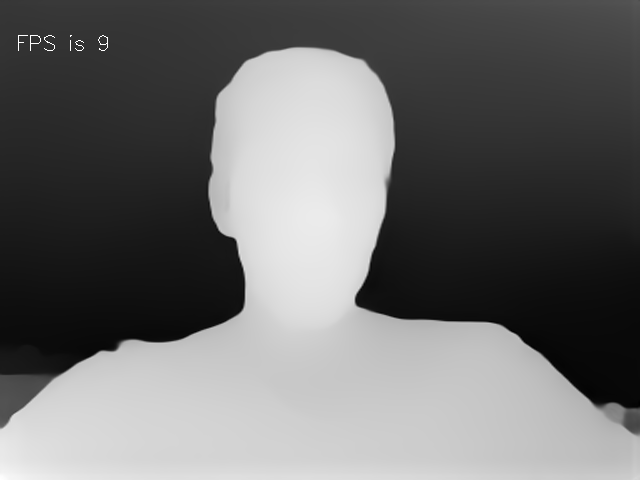

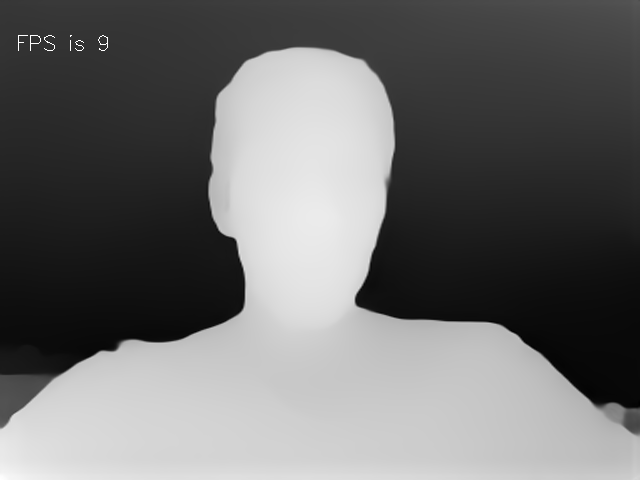

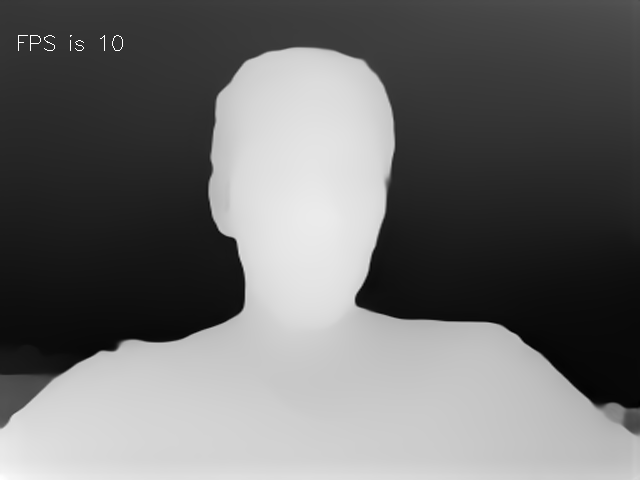

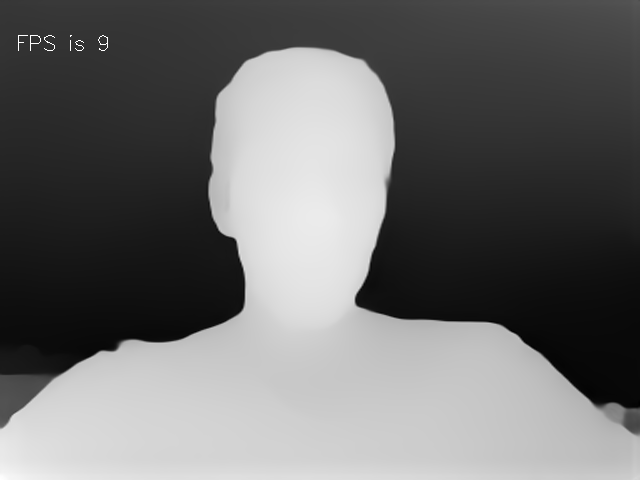

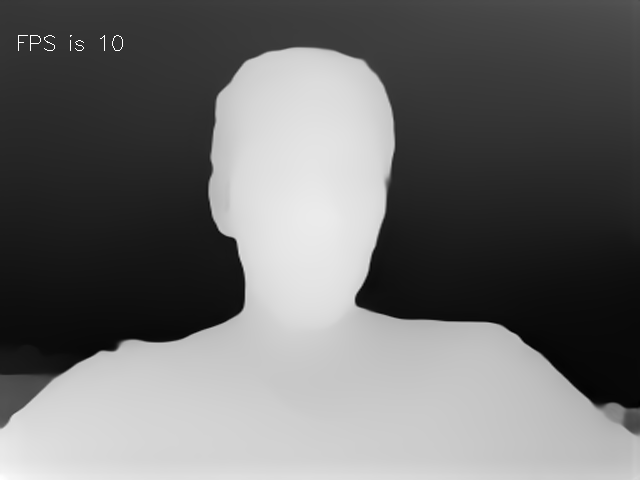

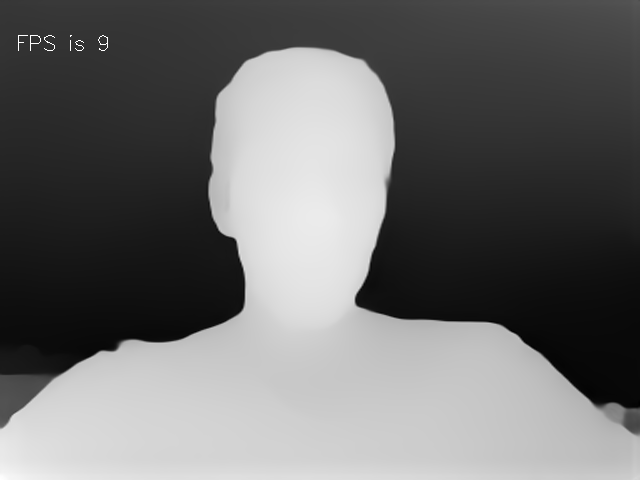

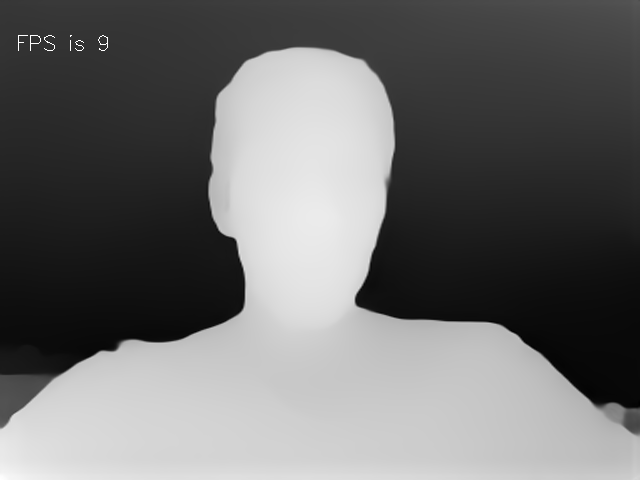

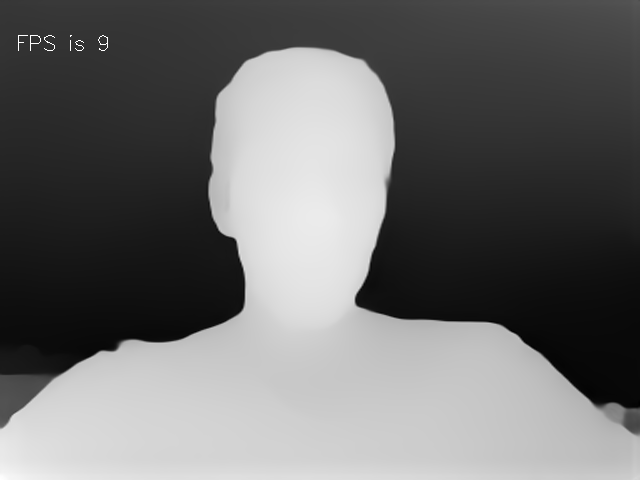

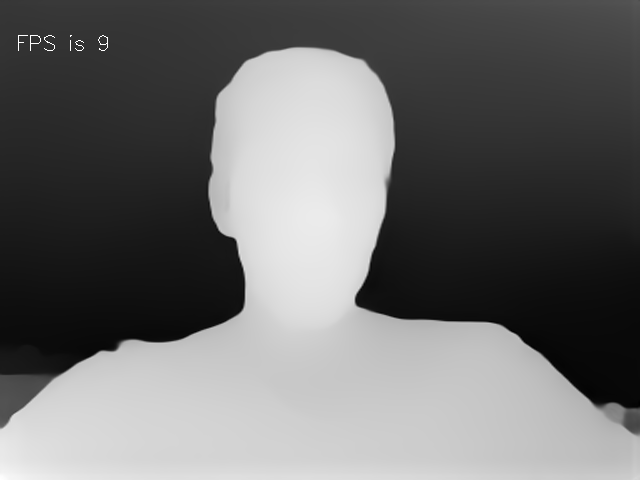

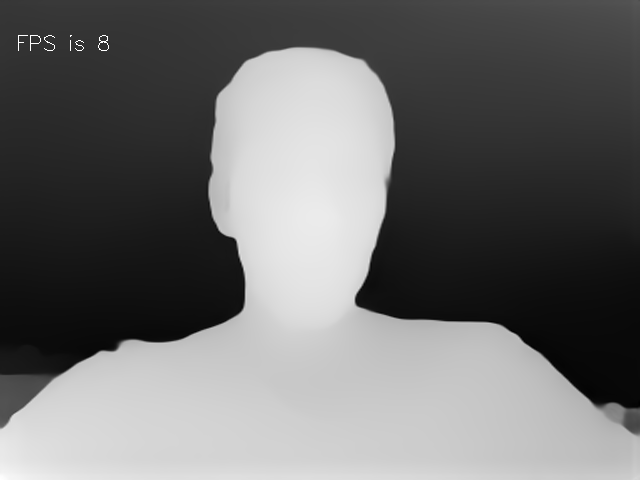

KeyboardInterrupt: ignored

In [ ]:
# Detectron on Video
midas_depth = Midas(mono_model)
# it is diplaying results, not as a video but each image by itself
# this is becase is loading with cv2
midas_depth.onVideo('./test.mp4')

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
midas_depth = Midas(mono_model1)
midas_depth.onImage_m("./input.jpg")

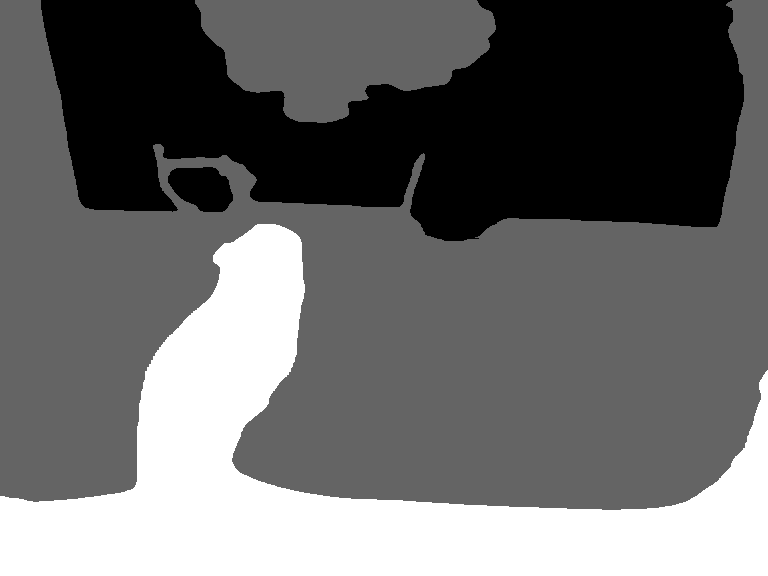

In [ ]:
cv2_imshow(dog_array)

[[118 118 118 ...  79  74  71]
 [118 118 118 ...  80  77  76]
 [119 119 118 ...  82  82  82]
 ...
 [179 179 178 ... 249 249 249]
 [180 179 179 ... 249 248 247]
 [180 180 180 ... 249 246 245]]


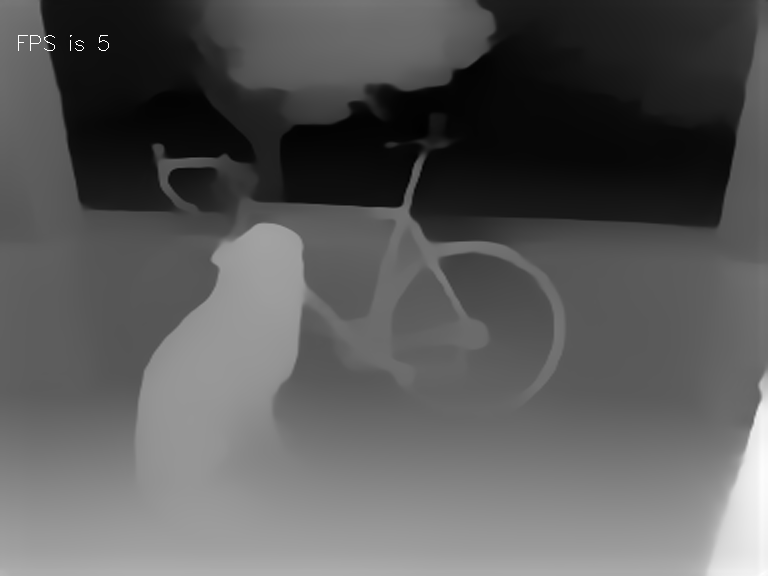

In [ ]:
from google.colab.patches import cv2_imshow
midas_depth.onImage("data/dog.jpg")

#### Real time colab

In [ ]:
# working code
if __name__ == "__main__":
  video_stream()
  # label for video
  label_html = 'Capturing...'
  # initialze bounding box to empty
  bbox = ''
  count = 0
  Model = Detector('PS')
  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    current_frame = Frames(frame, Model)  #form JS capture you are getting more information

    bbox = current_frame.get_detectron()

In [ ]:
# optimized code, still not getting reults
webcam = WebCam(Detector('PS'))
webcam.real_time_Detectron()

### Detectron directly

In [ ]:
# Detectron on Video
detectron = Detector('PS')
# it is diplaying results, not as a video but each image by itself
# this is becase is loading with cv2
detectron.onVideo('./test.mp4')

On image applications

In [ ]:
# Load it from image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
detectron = Detector('PS')
detectron.onImage("./input.jpg")

[{'id': 1, 'isthing': True, 'score': 0.9988574981689453, 'category_id': 17, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9947071671485901, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.9946304559707642, 'category_id': 0, 'instance_id': 2}, {'id': 4, 'isthing': True, 'score': 0.9824514985084534, 'category_id': 0, 'instance_id': 3}, {'id': 5, 'isthing': True, 'score': 0.9784326553344727, 'category_id': 0, 'instance_id': 4}, {'id': 6, 'isthing': True, 'score': 0.9649165272712708, 'category_id': 0, 'instance_id': 5}, {'id': 7, 'isthing': True, 'score': 0.9414774179458618, 'category_id': 0, 'instance_id': 6}, {'id': 8, 'isthing': True, 'score': 0.9249890446662903, 'category_id': 0, 'instance_id': 7}, {'id': 9, 'isthing': True, 'score': 0.8967695236206055, 'category_id': 0, 'instance_id': 8}, {'id': 10, 'isthing': True, 'score': 0.8388378024101257, 'category_id': 0, 'instance_id': 9}, {'id': 11, 'isthing': True, 'score': 0.7803848385810852, 'category_

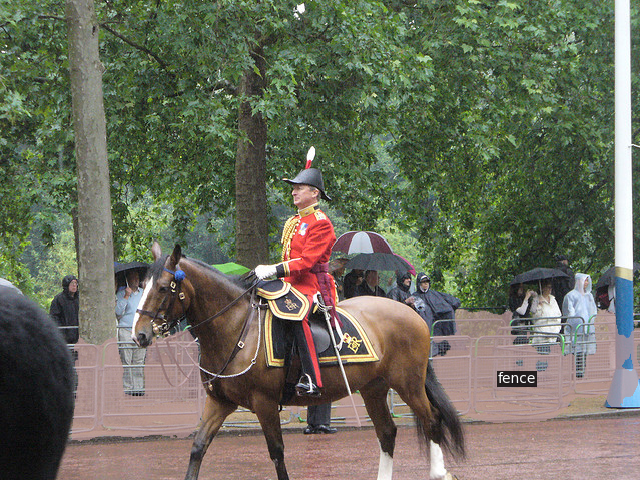

In [ ]:
detectron = Detector('PS')
detectron.onImage("./input.jpg")

[{'id': 1, 'isthing': True, 'score': 0.9953234791755676, 'category_id': 1, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9879891872406006, 'category_id': 16, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.7573422789573669, 'category_id': 2, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 8, 'area': 112550, 'class_label': 'floor-wood', 'class_hierarchy': 2}, {'id': 5, 'isthing': False, 'category_id': 21, 'area': 6835, 'class_label': 'road', 'class_hierarchy': 1}, {'id': 6, 'isthing': False, 'category_id': 33, 'area': 55076, 'class_label': 'wall-wood', 'class_hierarchy': 1}, {'id': 7, 'isthing': False, 'category_id': 36, 'area': 4242, 'class_label': 'window', 'class_hierarchy': 1}, {'id': 8, 'isthing': False, 'category_id': 37, 'area': 81799, 'class_label': 'tree', 'class_hierarchy': 3}, {'id': 9, 'isthing': False, 'category_id': 44, 'area': 25279, 'class_label': 'pavement', 'class_hierarchy': 3}, {'id': 10, 'isthing': False, 'category_id': 52, 'area': 

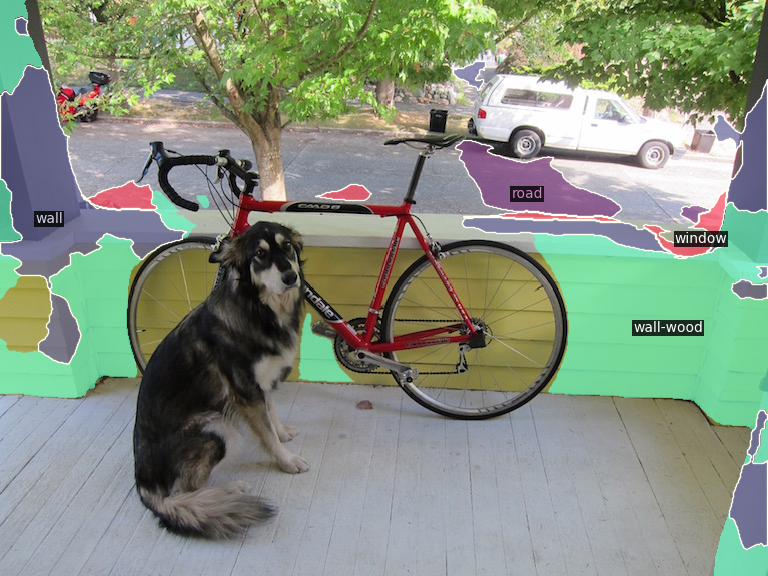

In [ ]:
# run test on person.jpg image that comes with repository
detectron = Detector('PS')
detectron.onImage("data/dog.jpg")

In [ ]:
# run test on person.jpg image that comes with repository
image = cv2.imread("./input.jpg")
image = cv2.imread("data/dog.jpg")
frame = Frames(image, Detector, darknet_helper)
frame.one_img_show()